<a href="https://colab.research.google.com/github/estebanschab/RL-GraphEmbeddings/blob/main/GraphsVRP_Embeddings_JCC2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Instalación e importación de librerías necesarias**

In [ ]:
import tempfile
tempdir = tempfile.gettempdir()

In [ ]:
!pip install pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import random
import numpy as np
import pandas as pd

#**Random Fuzzy Number Generator**





In [ ]:
#!pip install portion

In [ ]:
#import portion as P
from random import random as rm
import math

## Alpha-cut based (for unimodal Fuzzy Numbers)
From "Fuzzy Uncertainty in Random Variable Generation: An a-Cut Approach", by Christian Alfredo Varón-Gaviria, José Luis Barbosa-Fontecha, and Juan Carlos Figueroa-García

In [ ]:
def build_triangular_mf(a, b, c):
  if a > b or b > c:
    raise ValueError("Parameters must form a nondecreasing sequence")
  return lambda x: (x-a)/(b-a) if a <= x < b else (c - x)/(c - b) if b <= x < c else 0

def build_sampleable_triangular_mf(a, b, c):
  if a > b or b > c:
    raise ValueError("Parameters must form a nondecreasing sequence")
  Lambda1 = (b - a) / 2
  Lambda2 = (c - b) / 2
  Lambda = (c - a) / 2

  lambda1 = Lambda1 / Lambda
  lambda2 = Lambda2 / Lambda

  return lambda u1, u2: u1 * (b - a) + a if u2 <= lambda1 else c - u1 * (c - b)


In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

<ipython-input-5-cd9e54b682e8>:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


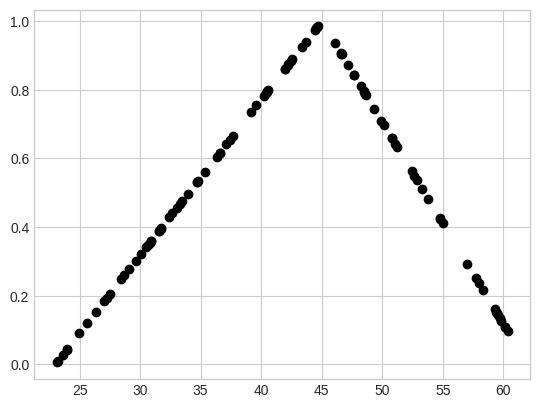

In [ ]:
n = 100

sampler = build_sampleable_triangular_mf(23, 45, 62)
mf = build_triangular_mf(23, 45, 62)
x = [sampler(rm(), rm()) for i in range(n)]
y = [mf(u) for u in x]
plt.plot(x, y, 'o', color='black')

## Cumulative membership function-based
From "Fuzzy Uncertainty in Random Variable Generation: A Cumulative Membership
Function Approach", by Diana Giseth Pulido-L´opez, Mabel García, and Juan Carlos Figueroa-García

In [ ]:
def build_trapezoidal_mf(a, b, c, d):
  if a > b or b > c or c > d:
    raise ValueError("Parameters must form a nondecreasing sequence")
  return lambda x: (x-a)/(b-a) if a <= x < b else 1 if b <= x < c else (d - x)/(d - c) if c <= x < d else 0

def build_sampleable_trapezoidal_mf(a, b, c, d):
  if a > b or b > c or c > d:
    raise ValueError("Parameters must form a nondecreasing sequence")
  Lambda1 = (b - a) / 2
  Lambda2 = c - b
  Lambda3 = (d - c) / 2
  Lambda = (c + d - a - b) / 2

  lambda1 = Lambda1 / Lambda
  lambda2 = Lambda2 / Lambda
  lambda3 = Lambda3 / Lambda

  return lambda u: a + math.sqrt((b - a) * 2 * u * Lambda) if u <= lambda1 else u * Lambda + b - Lambda1 if u <= (lambda1 + lambda2) else d - math.sqrt((d - c)**2 - 2 * (d - c) * (u * Lambda - Lambda1 - Lambda2))


In [ ]:
sampler = build_sampleable_trapezoidal_mf(23, 45, 62, 98)
mf = build_trapezoidal_mf(23, 45, 62, 98)

for j in range(100):
  r = sampler(rm())
  print("({}, {})".format(r, mf(r)))

(45.7278201600919, 1)
(88.99348996781669, 0.2501808342273143)
(50.75265270480933, 1)
(37.50001764818678, 0.6590917112812171)
(37.85289237937958, 0.675131471789981)
(85.45039865275166, 0.34860003742356505)
(47.59157470591933, 1)
(66.1740815758453, 0.8840532895598526)
(39.80485002709048, 0.7638568194132037)
(29.339682979736303, 0.28816740816983194)
(53.65853111329707, 1)
(53.1138498737606, 1)
(53.386694163980295, 1)
(52.10265041762809, 1)
(36.15791500629932, 0.5980870457408781)
(67.4534979582379, 0.8485139456045027)
(58.23497082694149, 1)
(39.520381479130236, 0.7509264308695562)
(54.99559981361418, 1)
(27.3401384571938, 0.1972790207815363)
(62.88370628734387, 0.9754526031293369)
(60.54744487205855, 1)
(63.540023530466904, 0.9572215685981416)
(61.44885540107347, 1)
(33.07705084012282, 0.4580477654601283)
(59.97767351041102, 1)
(52.924346028826, 1)
(66.59953667159965, 0.8722350924555653)
(77.5356952569419, 0.5684529095293915)
(50.515636042458134, 1)
(58.458444407612774, 1)
(86.953079244272

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

<ipython-input-9-cd9e54b682e8>:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


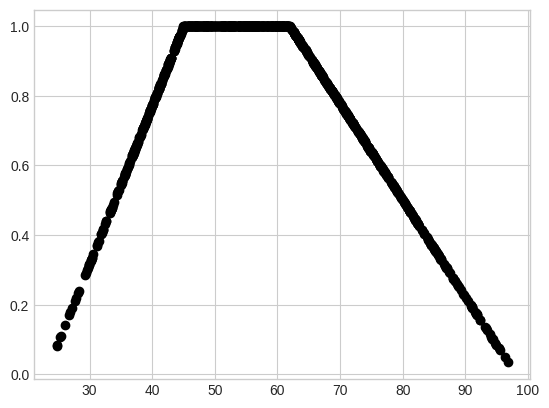

In [ ]:
n = 1000
x = [sampler(rm()) for i in range(n)]
y = [mf(u) for u in x]
plt.plot(x, y, 'o', color='black')

# **Definicion e inicializacion de estructuras de datos**



### Samplers for Random Fuzzy Number Generator

In [ ]:
sampler_triangular = build_sampleable_triangular_mf(0.3, 0.4, 0.45)
sampler_trapezoidal_prod_estim = build_sampleable_trapezoidal_mf(23, 35, 43, 55)
sampler_trapezoidal_prod_pedido = build_sampleable_trapezoidal_mf(40, 43, 46, 50)

In [ ]:
sampler_trapezoidal_prod_estim(rm())
sampler_triangular(rm(),rm())

0.3819969079796578

In [ ]:
# Tabla de distancias/tiempos estimados entre los clientes, incluyendo el deposito (intervalo fuzzy)
# revisar esta tabala para generar un intervalo fuzzy !!!
carnicerias = ['Frigorifico Tres Arroyos','La Blanq y D Gaspar','La Blanquita','Rougier Carnes','La Pulperia','Granja de Rosso','La Estancia','El Buen Trato','El Ternero Gasolero','La Imbatible']
tiempos = np.array([[0, 9, 6, 4, 4, 7, 9, 10, 12, 10],
[8, 0, 5, 8, 8, 9, 9, 10, 11, 9],
[6, 6, 0, 5, 5, 5, 5, 8, 7, 5],
[4, 8, 5, 0, 1, 4, 5, 5, 7, 6],
[5, 9, 6, 3, 0, 5, 7, 6, 8, 7],
[7, 9, 6, 5, 5, 0, 4, 3, 5, 4],
[8, 9, 5, 6, 5, 2, 0, 5, 4, 2],
[9, 12, 9, 7, 6, 5, 6, 0, 5, 7],
[10, 11, 7, 8, 7, 5, 4, 3, 0, 4],
[9, 9, 6, 7, 6, 5, 3, 7, 6, 0]])
df_tiempos = pd.DataFrame(tiempos, columns=carnicerias, index=carnicerias)
df_tiempos

# Tabla de Planificacion inicial de orden de visita, con estimacion de cantidad de productos requeridos (intervalo fuzzy)
# revisar esta tabala para generar un intervalo fuzzy !!!
data_planificacion = np.array([['La Blanq y D Gaspar',1,4, 40,int(sampler_trapezoidal_prod_estim(rm())),0],
                              ['La Blanquita',2,3, 40,int(sampler_trapezoidal_prod_estim(rm())),0],
                              ['Rougier Carnes',3,2,40,int(sampler_trapezoidal_prod_estim(rm())),0],
                              ['La Pulperia',4,1, 40,int(sampler_trapezoidal_prod_estim(rm())),0],
                              ['Granja de Rosso',5,5,40,int(sampler_trapezoidal_prod_estim(rm())),0],
                              ['La Estancia',6,6,40,int(sampler_trapezoidal_prod_estim(rm())),0],
                              ['El Buen Trato',7,9,40,int(sampler_trapezoidal_prod_estim(rm())),0],
                              ['El Ternero Gasolero',8,8,40,int(sampler_trapezoidal_prod_estim(rm())),0],
                              ['La Imbatible',9,7,40,int(sampler_trapezoidal_prod_estim(rm())),0]])
df_planificacion =  pd.DataFrame(data_planificacion, columns=['cliente','idCliente','orden','productosEstimados','productosPedidos','productosRecibidos'])
df_planificacion

# Tabla de "registro de viaje": orden de visita real, confirmacion de atencion, duracion del viaje, tiempos de llegada, tiempo de atencion, cantidad de pedido real (en el momento), cantidad de productos realmente entregados
#data_viaje = np.array([0,0,0,0,0,0,0,0]) # se cargaria durante la simulacion
df_viaje =  pd.DataFrame( columns=['Cliente','orden_visita_real','duracion_viaje','tiempo_llegada','duracion_espera','posponer','tiempo_atencion','pedido','duracion_atencion','entregar','entregado'])
df_viaje

# Vehiculos (capacidad, prod disp, prod entregados, tiempos/dist recorrida... )
capacity_vehicle_1 = 450
available_products_vehicle_1 = 410
warehouse_vehicle_1 = 'Frigorifico Tres Arroyos' #ubicacion inicial
current_time=''
current_event= ''
current_location = warehouse_vehicle_1


=============================================
# **NetworkX**
Instalación y pruebas

In [ ]:
#!pip install networkx[default]
!pip install --user networkx==2.8.8 
#1.15.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached networkx-2.8.8-py3-none-any.whl (2.0 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
karateclub 1.3.3 requires networkx<2.7, but you have networkx 2.8.8 which is incompatible.


In [ ]:
import networkx as nx
import matplotlib
import matplotlib.pyplot as plt

In [ ]:
tiempos
df_tiempos

,Frigorifico Tres Arroyos,La Blanq y D Gaspar,La Blanquita,Rougier Carnes,La Pulperia,Granja de Rosso,La Estancia,El Buen Trato,El Ternero Gasolero,La Imbatible
Frigorifico Tres Arroyos,0,9,6,4,4,7,9,10,12,10
La Blanq y D Gaspar,8,0,5,8,8,9,9,10,11,9
La Blanquita,6,6,0,5,5,5,5,8,7,5
Rougier Carnes,4,8,5,0,1,4,5,5,7,6
La Pulperia,5,9,6,3,0,5,7,6,8,7
Granja de Rosso,7,9,6,5,5,0,4,3,5,4
La Estancia,8,9,5,6,5,2,0,5,4,2
El Buen Trato,9,12,9,7,6,5,6,0,5,7
El Ternero Gasolero,10,11,7,8,7,5,4,3,0,4
La Imbatible,9,9,6,7,6,5,3,7,6,0


In [ ]:
A = tiempos
B = df_tiempos
#G = nx.from_numpy_matrix(A)
GP = nx.from_pandas_adjacency(B)

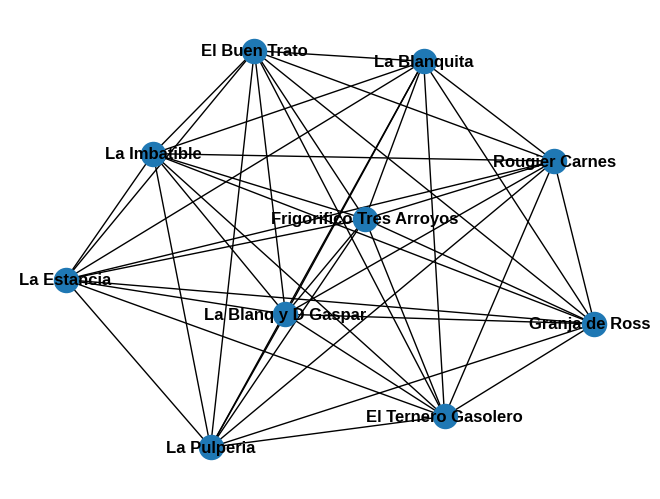

In [ ]:
nx.draw(GP, with_labels=True, font_weight='bold')

In [ ]:
#GP.edges
GP.nodes

NodeView(('Frigorifico Tres Arroyos', 'La Blanq y D Gaspar', 'La Blanquita', 'Rougier Carnes', 'La Pulperia', 'Granja de Rosso', 'La Estancia', 'El Buen Trato', 'El Ternero Gasolero', 'La Imbatible'))

In [ ]:
GP.edges.data()
distancias = nx.get_edge_attributes(GP,'weight')
distancias

{('Frigorifico Tres Arroyos', 'La Blanq y D Gaspar'): 8,
 ('Frigorifico Tres Arroyos', 'La Blanquita'): 6,
 ('Frigorifico Tres Arroyos', 'Rougier Carnes'): 4,
 ('Frigorifico Tres Arroyos', 'La Pulperia'): 5,
 ('Frigorifico Tres Arroyos', 'Granja de Rosso'): 7,
 ('Frigorifico Tres Arroyos', 'La Estancia'): 8,
 ('Frigorifico Tres Arroyos', 'El Buen Trato'): 9,
 ('Frigorifico Tres Arroyos', 'El Ternero Gasolero'): 10,
 ('Frigorifico Tres Arroyos', 'La Imbatible'): 9,
 ('La Blanq y D Gaspar', 'La Blanquita'): 6,
 ('La Blanq y D Gaspar', 'Rougier Carnes'): 8,
 ('La Blanq y D Gaspar', 'La Pulperia'): 9,
 ('La Blanq y D Gaspar', 'Granja de Rosso'): 9,
 ('La Blanq y D Gaspar', 'La Estancia'): 9,
 ('La Blanq y D Gaspar', 'El Buen Trato'): 12,
 ('La Blanq y D Gaspar', 'El Ternero Gasolero'): 11,
 ('La Blanq y D Gaspar', 'La Imbatible'): 9,
 ('La Blanquita', 'Rougier Carnes'): 5,
 ('La Blanquita', 'La Pulperia'): 6,
 ('La Blanquita', 'Granja de Rosso'): 6,
 ('La Blanquita', 'La Estancia'): 5,
 ('

In [ ]:
distancias.keys()

dict_keys([('Frigorifico Tres Arroyos', 'La Blanq y D Gaspar'), ('Frigorifico Tres Arroyos', 'La Blanquita'), ('Frigorifico Tres Arroyos', 'Rougier Carnes'), ('Frigorifico Tres Arroyos', 'La Pulperia'), ('Frigorifico Tres Arroyos', 'Granja de Rosso'), ('Frigorifico Tres Arroyos', 'La Estancia'), ('Frigorifico Tres Arroyos', 'El Buen Trato'), ('Frigorifico Tres Arroyos', 'El Ternero Gasolero'), ('Frigorifico Tres Arroyos', 'La Imbatible'), ('La Blanq y D Gaspar', 'La Blanquita'), ('La Blanq y D Gaspar', 'Rougier Carnes'), ('La Blanq y D Gaspar', 'La Pulperia'), ('La Blanq y D Gaspar', 'Granja de Rosso'), ('La Blanq y D Gaspar', 'La Estancia'), ('La Blanq y D Gaspar', 'El Buen Trato'), ('La Blanq y D Gaspar', 'El Ternero Gasolero'), ('La Blanq y D Gaspar', 'La Imbatible'), ('La Blanquita', 'Rougier Carnes'), ('La Blanquita', 'La Pulperia'), ('La Blanquita', 'Granja de Rosso'), ('La Blanquita', 'La Estancia'), ('La Blanquita', 'El Buen Trato'), ('La Blanquita', 'El Ternero Gasolero'), ('L

In [ ]:
for i in distancias.keys():
  print(i, ': ', distancias[i],  end=" - ")

('Frigorifico Tres Arroyos', 'La Blanq y D Gaspar') :  8 - ('Frigorifico Tres Arroyos', 'La Blanquita') :  6 - ('Frigorifico Tres Arroyos', 'Rougier Carnes') :  4 - ('Frigorifico Tres Arroyos', 'La Pulperia') :  5 - ('Frigorifico Tres Arroyos', 'Granja de Rosso') :  7 - ('Frigorifico Tres Arroyos', 'La Estancia') :  8 - ('Frigorifico Tres Arroyos', 'El Buen Trato') :  9 - ('Frigorifico Tres Arroyos', 'El Ternero Gasolero') :  10 - ('Frigorifico Tres Arroyos', 'La Imbatible') :  9 - ('La Blanq y D Gaspar', 'La Blanquita') :  6 - ('La Blanq y D Gaspar', 'Rougier Carnes') :  8 - ('La Blanq y D Gaspar', 'La Pulperia') :  9 - ('La Blanq y D Gaspar', 'Granja de Rosso') :  9 - ('La Blanq y D Gaspar', 'La Estancia') :  9 - ('La Blanq y D Gaspar', 'El Buen Trato') :  12 - ('La Blanq y D Gaspar', 'El Ternero Gasolero') :  11 - ('La Blanq y D Gaspar', 'La Imbatible') :  9 - ('La Blanquita', 'Rougier Carnes') :  5 - ('La Blanquita', 'La Pulperia') :  6 - ('La Blanquita', 'Granja de Rosso') :  6 - 

In [ ]:
GP.nodes
GP.nodes['Frigorifico Tres Arroyos']['demanda_estimada'] = 0 #DEPOSITO
GP.nodes['La Blanq y D Gaspar']['demanda_estimada'] = int(sampler_trapezoidal_prod_estim(rm()))
GP.nodes['La Blanquita']['demanda_estimada'] = int(sampler_trapezoidal_prod_estim(rm()))
GP.nodes['Rougier Carnes']['demanda_estimada'] = int(sampler_trapezoidal_prod_estim(rm()))
GP.nodes['La Pulperia']['demanda_estimada'] = int(sampler_trapezoidal_prod_estim(rm()))
GP.nodes['Granja de Rosso']['demanda_estimada'] = int(sampler_trapezoidal_prod_estim(rm()))
GP.nodes['La Estancia']['demanda_estimada'] = int(sampler_trapezoidal_prod_estim(rm()))
GP.nodes['El Buen Trato']['demanda_estimada'] = int(sampler_trapezoidal_prod_estim(rm()))
GP.nodes['El Ternero Gasolero']['demanda_estimada'] = int(sampler_trapezoidal_prod_estim(rm()))
GP.nodes['La Imbatible']['demanda_estimada'] = int(sampler_trapezoidal_prod_estim(rm()))

GP.nodes.data()

NodeDataView({'Frigorifico Tres Arroyos': {'demanda_estimada': 0}, 'La Blanq y D Gaspar': {'demanda_estimada': 25}, 'La Blanquita': {'demanda_estimada': 50}, 'Rougier Carnes': {'demanda_estimada': 41}, 'La Pulperia': {'demanda_estimada': 37}, 'Granja de Rosso': {'demanda_estimada': 33}, 'La Estancia': {'demanda_estimada': 47}, 'El Buen Trato': {'demanda_estimada': 54}, 'El Ternero Gasolero': {'demanda_estimada': 50}, 'La Imbatible': {'demanda_estimada': 47}})

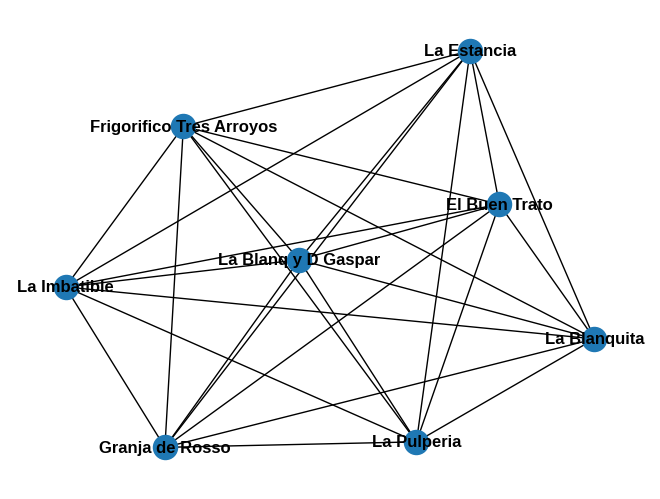

In [ ]:
nx.draw(H, with_labels=True, font_weight='bold')

## Definición Distancias

In [ ]:
#Distancia de edicion entre grafos
nx.graph_edit_distance(GP, H)



19.0

In [ ]:
G1=GP
G2 = H

# arguments for nodes
def node_subst_cost(node1, node2):
    # check if the nodes are equal, if yes then apply no cost, else apply 1
    if node1 == node2:
        return 0
    return (abs(node1['demanda_estimada'] - node2['demanda_estimada']))

def node_del_cost(node):
    return abs(node['demanda_estimada'])  # here you apply the cost for node deletion

def node_ins_cost(node):
    return abs(node['demanda_estimada'])  # here you apply the cost for node insertion

# arguments for edges
def edge_subst_cost(edge1, edge2):
    # check if the edges are equal, if yes then apply no cost, else apply 3
    if edge1==edge2:
        return 0
    return (abs(edge1['weight'] - edge2['weight']))

def edge_del_cost(edge):
    return edge['weight'] # here you apply the cost for edge deletion

def edge_ins_cost(edge):
    return edge['weight']  # here you apply the cost for edge insertion

cost_function = lambda G1,G2: nx.graph_edit_distance(
    G1,
    G2,
    node_subst_cost=node_subst_cost,
    node_del_cost=node_del_cost,
    node_ins_cost=node_ins_cost,
    edge_subst_cost=edge_subst_cost,
    edge_del_cost=edge_del_cost,
    edge_ins_cost=edge_ins_cost
)

print(cost_function(G1,G2))


197.0


In [ ]:
print(cost_function(G1,G2))

197.0


In [ ]:
GG = [GP,H,GP,H]

In [ ]:
def graphs_distance(G):

  Y = []

  #vamos agregando las distancias
  for i in range(len(G)):
    
    if (i<len(G)):
      for g in range(i+1,len(G)):
        Y.append(cost_function(G[i],G[g]))

  return Y

In [ ]:
distancias = graphs_distance(GG)
distancias

[197.0, 0.0, 197.0, 197.0, 0.0, 197.0]

## Dataset

In [ ]:
##
sampler_triangular = build_sampleable_triangular_mf(0.3, 0.4, 0.45)
sampler_trapezoidal_prod_estim = build_sampleable_trapezoidal_mf(23, 35, 43, 55)
sampler_trapezoidal_prod_estim_high = build_sampleable_trapezoidal_mf(30, 45, 55, 75)

sampler_trapezoidal_prod_estim_2 = build_sampleable_trapezoidal_mf(25, 32, 40, 50)
sampler_trapezoidal_prod_estim_high_2 = build_sampleable_trapezoidal_mf(30, 48, 60, 80)

sampler_trapezoidal_prod_estim_3 = build_sampleable_trapezoidal_mf(25, 35, 40, 45)
sampler_trapezoidal_prod_estim_high_3 = build_sampleable_trapezoidal_mf(20, 38, 55, 75)

sampler_trapezoidal_prod_estim_4 = build_sampleable_trapezoidal_mf(20, 33, 38, 48)
sampler_trapezoidal_prod_estim_high_4 = build_sampleable_trapezoidal_mf(25, 38, 50, 70)

sampler_trapezoidal_prod_estim_5 = build_sampleable_trapezoidal_mf(18, 28, 38, 45)
sampler_trapezoidal_prod_estim_high_5 = build_sampleable_trapezoidal_mf(28, 42, 52, 73)

In [ ]:
"""
0- 'Frigorifico Tres Arroyos'
1- 'La Blanq y D Gaspar'
2- 'La Blanquita'
3- 'Rougier Carnes'
4- 'La Pulperia'
5- 'Granja de Rosso'
6- 'La Estancia'
7- 'El Buen Trato'
8- 'El Ternero Gasolero'
9- 'La Imbatible'
"""

"\n0- 'Frigorifico Tres Arroyos'\n1- 'La Blanq y D Gaspar'\n2- 'La Blanquita'\n3- 'Rougier Carnes'\n4- 'La Pulperia'\n5- 'Granja de Rosso'\n6- 'La Estancia'\n7- 'El Buen Trato'\n8- 'El Ternero Gasolero'\n9- 'La Imbatible'\n"

In [ ]:
#Tiempos en hora pico
times_map_slow = tiempos.copy()
times_map_slow[[0,2,4,5,8]] = 4* times_map_slow[[0,2,4,5,8]]
times_map_slow[[1,3,6,7,9]] = 1.5 * times_map_slow[[1,3,6,7,9]]


In [ ]:
##  se crea PRIMERO el grafo mas completo con 9 clientes y se va guardando y quitando algunos clientes o cambiando los atributos...

# Grafos con tiempos iniciales y baja incertidumbre en las demandas
#9 clientes

#B = df_tiempos
#G9CT1D1 = nx.from_pandas_adjacency(B)

A = tiempos
G9CT1D1 = nx.from_numpy_matrix(A)


#G9CT1D1.nodes['Frigorifico Tres Arroyos']['demanda_estimada'] = 0 #DEPOSITO
#G9CT1D1.nodes['La Blanq y D Gaspar']['demanda_estimada'] = int(sampler_trapezoidal_prod_estim(rm()))
#G9CT1D1.nodes['La Blanquita']['demanda_estimada'] = int(sampler_trapezoidal_prod_estim(rm()))
#G9CT1D1.nodes['Rougier Carnes']['demanda_estimada'] = int(sampler_trapezoidal_prod_estim(rm()))
#G9CT1D1.nodes['La Pulperia']['demanda_estimada'] = int(sampler_trapezoidal_prod_estim(rm()))
#G9CT1D1.nodes['Granja de Rosso']['demanda_estimada'] = int(sampler_trapezoidal_prod_estim(rm()))
#G9CT1D1.nodes['La Estancia']['demanda_estimada'] = int(sampler_trapezoidal_prod_estim(rm()))
#G9CT1D1.nodes['El Buen Trato']['demanda_estimada'] = int(sampler_trapezoidal_prod_estim(rm()))
#G9CT1D1.nodes['El Ternero Gasolero']['demanda_estimada'] = int(sampler_trapezoidal_prod_estim(rm()))
#G9CT1D1.nodes['La Imbatible']['demanda_estimada'] = int(sampler_trapezoidal_prod_estim(rm()))

G9CT1D1.nodes[0]['demanda_estimada'] = 0 #DEPOSITO
G9CT1D1.nodes[1]['demanda_estimada'] = int(sampler_trapezoidal_prod_estim_5(rm()))
G9CT1D1.nodes[2]['demanda_estimada'] = int(sampler_trapezoidal_prod_estim_5(rm()))
G9CT1D1.nodes[3]['demanda_estimada'] = int(sampler_trapezoidal_prod_estim_5(rm()))
G9CT1D1.nodes[4]['demanda_estimada'] = int(sampler_trapezoidal_prod_estim_5(rm()))
G9CT1D1.nodes[5]['demanda_estimada'] = int(sampler_trapezoidal_prod_estim_5(rm()))
G9CT1D1.nodes[6]['demanda_estimada'] = int(sampler_trapezoidal_prod_estim_5(rm()))
G9CT1D1.nodes[7]['demanda_estimada'] = int(sampler_trapezoidal_prod_estim_5(rm()))
G9CT1D1.nodes[8]['demanda_estimada'] = int(sampler_trapezoidal_prod_estim_5(rm()))
G9CT1D1.nodes[9]['demanda_estimada'] = int(sampler_trapezoidal_prod_estim_5(rm()))


#7 clientes
G7CT1D1 = G9CT1D1.copy()
#G7CT1D1.remove_node(3)
#G7CT1D1.remove_node(8)

G7CT1D1.remove_edge(3,0)
G7CT1D1.remove_edge(3,1)
G7CT1D1.remove_edge(3,2)
G7CT1D1.remove_edge(3,4)
G7CT1D1.remove_edge(3,5)
G7CT1D1.remove_edge(3,6)
G7CT1D1.remove_edge(3,7)
G7CT1D1.remove_edge(3,8)
G7CT1D1.remove_edge(3,9)

G7CT1D1.remove_edge(8,0)
G7CT1D1.remove_edge(8,1)
G7CT1D1.remove_edge(8,2)
G7CT1D1.remove_edge(8,4)
G7CT1D1.remove_edge(8,5)
G7CT1D1.remove_edge(8,6)
G7CT1D1.remove_edge(8,7)
G7CT1D1.remove_edge(8,9)


#5 clientes
G5CT1D1 = G7CT1D1.copy()
#G5CT1D1.remove_node(5)
#G5CT1D1.remove_node(7) #'El Buen Trato')

G5CT1D1.remove_edge(5,0)
G5CT1D1.remove_edge(5,1)
G5CT1D1.remove_edge(5,2)
G5CT1D1.remove_edge(5,4)
G5CT1D1.remove_edge(5,6)
G5CT1D1.remove_edge(5,7)
G5CT1D1.remove_edge(5,9)

G5CT1D1.remove_edge(7,0)
G5CT1D1.remove_edge(7,1)
G5CT1D1.remove_edge(7,2)
G5CT1D1.remove_edge(7,4)
G5CT1D1.remove_edge(7,6)
G5CT1D1.remove_edge(7,9)


#3 clientes
G3CT1D1 = G5CT1D1.copy()
#G3CT1D1.remove_node(1)
#G3CT1D1.remove_node(2)

G3CT1D1.remove_edge(1,0)
G3CT1D1.remove_edge(1,2)
G3CT1D1.remove_edge(1,4)
G3CT1D1.remove_edge(1,6)
G3CT1D1.remove_edge(1,9)

G3CT1D1.remove_edge(2,0)
G3CT1D1.remove_edge(2,4)
G3CT1D1.remove_edge(2,6)
G3CT1D1.remove_edge(2,9)


#2 clientes
G2CT1D1 = G3CT1D1.copy()
#G2CT1D1.remove_node(9)

G2CT1D1.remove_edge(9,0)
G2CT1D1.remove_edge(9,4)
G2CT1D1.remove_edge(9,6)



# Grafos con tiempos iniciales y alta incertidumbre en las demandas

#9 clientes
#B = df_tiempos
#G9CT1D2 = nx.from_pandas_adjacency(B)
G9CT1D2 = nx.from_numpy_matrix(A)

G9CT1D2.nodes[0]['demanda_estimada'] = 0 #DEPOSITO
G9CT1D2.nodes[1]['demanda_estimada'] = int(sampler_trapezoidal_prod_estim_high_5(rm()))
G9CT1D2.nodes[2]['demanda_estimada'] = int(sampler_trapezoidal_prod_estim_high_5(rm()))
G9CT1D2.nodes[3]['demanda_estimada'] = int(sampler_trapezoidal_prod_estim_high_5(rm()))
G9CT1D2.nodes[4]['demanda_estimada'] = int(sampler_trapezoidal_prod_estim_high_5(rm()))
G9CT1D2.nodes[5]['demanda_estimada'] = int(sampler_trapezoidal_prod_estim_high_5(rm()))
G9CT1D2.nodes[6]['demanda_estimada'] = int(sampler_trapezoidal_prod_estim_high_5(rm()))
G9CT1D2.nodes[7]['demanda_estimada'] = int(sampler_trapezoidal_prod_estim_high_5(rm()))
G9CT1D2.nodes[8]['demanda_estimada'] = int(sampler_trapezoidal_prod_estim_high_5(rm()))
G9CT1D2.nodes[9]['demanda_estimada'] = int(sampler_trapezoidal_prod_estim_high_5(rm()))


#7 clientes
G7CT1D2 = G9CT1D2.copy()
#G7CT1D2.remove_node(3) #'Rougier Carnes')
#G7CT1D2.remove_node(8) #'El Ternero Gasolero')

G7CT1D2.remove_edge(3,0)
G7CT1D2.remove_edge(3,1)
G7CT1D2.remove_edge(3,2)
G7CT1D2.remove_edge(3,4)
G7CT1D2.remove_edge(3,5)
G7CT1D2.remove_edge(3,6)
G7CT1D2.remove_edge(3,7)
G7CT1D2.remove_edge(3,8)
G7CT1D2.remove_edge(3,9)

G7CT1D2.remove_edge(8,0)
G7CT1D2.remove_edge(8,1)
G7CT1D2.remove_edge(8,2)
G7CT1D2.remove_edge(8,4)
G7CT1D2.remove_edge(8,5)
G7CT1D2.remove_edge(8,6)
G7CT1D2.remove_edge(8,7)
G7CT1D2.remove_edge(8,9)


#5 clientes
G5CT1D2 = G7CT1D2.copy()
#G5CT1D2.remove_node(5) #'Granja de Rosso')
#G5CT1D2.remove_node(7) #'El Buen Trato')

G5CT1D2.remove_edge(5,0)
G5CT1D2.remove_edge(5,1)
G5CT1D2.remove_edge(5,2)
G5CT1D2.remove_edge(5,4)
G5CT1D2.remove_edge(5,6)
G5CT1D2.remove_edge(5,7)
G5CT1D2.remove_edge(5,9)

G5CT1D2.remove_edge(7,0)
G5CT1D2.remove_edge(7,1)
G5CT1D2.remove_edge(7,2)
G5CT1D2.remove_edge(7,4)
G5CT1D2.remove_edge(7,6)
G5CT1D2.remove_edge(7,9)


#3 clientes
G3CT1D2 = G5CT1D2.copy()
#G3CT1D2.remove_node(1) #'La Blanq y D Gaspar')
#G3CT1D2.remove_node(2) #'La Blanquita')

G3CT1D2.remove_edge(1,0)
G3CT1D2.remove_edge(1,2)
G3CT1D2.remove_edge(1,4)
G3CT1D2.remove_edge(1,6)
G3CT1D2.remove_edge(1,9)

G3CT1D2.remove_edge(2,0)
G3CT1D2.remove_edge(2,4)
G3CT1D2.remove_edge(2,6)
G3CT1D2.remove_edge(2,9)


#2 clientes
G2CT1D2 = G3CT1D2.copy()
#G2CT1D2.remove_node(9) #'La Imbatible')

G2CT1D2.remove_edge(9,0)
G2CT1D2.remove_edge(9,4)
G2CT1D2.remove_edge(9,6)


# ============

#Tiempos en hora pico
#times_map_slow = df_tiempos.copy()
#times_map_slow[['Frigorifico Tres Arroyos','La Blanquita','La Pulperia','Granja de Rosso','El Ternero Gasolero']] = 4* times_map_slow[['Frigorifico Tres Arroyos','La Blanquita','La Pulperia','Granja de Rosso','El Ternero Gasolero']]
#times_map_slow[['La Blanq y D Gaspar','Rougier Carnes','La Estancia','El Buen Trato','La Imbatible']] = 1.5 * times_map_slow[['La Blanq y D Gaspar','Rougier Carnes','La Estancia','El Buen Trato','La Imbatible']]

times_map_slow = tiempos.copy()
times_map_slow[[0,2,4,5,8]] = 4* times_map_slow[[0,2,4,5,8]]
times_map_slow[[1,3,6,7,9]] = 1.5 * times_map_slow[[1,3,6,7,9]]

# Grafos con tiempos en hora pico y baja incertidumbre en las demandas
#9 clientes
B = times_map_slow
#G9CT2D1 = nx.from_pandas_adjacency(B)
G9CT2D1 = nx.from_numpy_matrix(B)

G9CT2D1.nodes[0]['demanda_estimada'] = 0 #DEPOSITO
G9CT2D1.nodes[1]['demanda_estimada'] = int(sampler_trapezoidal_prod_estim_5(rm()))
G9CT2D1.nodes[2]['demanda_estimada'] = int(sampler_trapezoidal_prod_estim_5(rm()))
G9CT2D1.nodes[3]['demanda_estimada'] = int(sampler_trapezoidal_prod_estim_5(rm()))
G9CT2D1.nodes[4]['demanda_estimada'] = int(sampler_trapezoidal_prod_estim_5(rm()))
G9CT2D1.nodes[5]['demanda_estimada'] = int(sampler_trapezoidal_prod_estim_5(rm()))
G9CT2D1.nodes[6]['demanda_estimada'] = int(sampler_trapezoidal_prod_estim_5(rm()))
G9CT2D1.nodes[7]['demanda_estimada'] = int(sampler_trapezoidal_prod_estim_5(rm()))
G9CT2D1.nodes[8]['demanda_estimada'] = int(sampler_trapezoidal_prod_estim_5(rm()))
G9CT2D1.nodes[9]['demanda_estimada'] = int(sampler_trapezoidal_prod_estim_5(rm()))


#7 clientes
G7CT2D1 = G9CT2D1.copy()
#G7CT2D1.remove_node(3) #'Rougier Carnes')
#G7CT2D1.remove_node(8) #'El Ternero Gasolero')

G7CT2D1.remove_edge(3,0)
G7CT2D1.remove_edge(3,1)
G7CT2D1.remove_edge(3,2)
G7CT2D1.remove_edge(3,4)
G7CT2D1.remove_edge(3,5)
G7CT2D1.remove_edge(3,6)
G7CT2D1.remove_edge(3,7)
G7CT2D1.remove_edge(3,8)
G7CT2D1.remove_edge(3,9)

G7CT2D1.remove_edge(8,0)
G7CT2D1.remove_edge(8,1)
G7CT2D1.remove_edge(8,2)
G7CT2D1.remove_edge(8,4)
G7CT2D1.remove_edge(8,5)
G7CT2D1.remove_edge(8,6)
G7CT2D1.remove_edge(8,7)
G7CT2D1.remove_edge(8,9)


#5 clientes
G5CT2D1 = G7CT2D1.copy()
#G5CT2D1.remove_node(5) #'Granja de Rosso')
#G5CT2D1.remove_node(7) #'El Buen Trato')

G5CT2D1.remove_edge(5,0)
G5CT2D1.remove_edge(5,1)
G5CT2D1.remove_edge(5,2)
G5CT2D1.remove_edge(5,4)
G5CT2D1.remove_edge(5,6)
G5CT2D1.remove_edge(5,7)
G5CT2D1.remove_edge(5,9)

G5CT2D1.remove_edge(7,0)
G5CT2D1.remove_edge(7,1)
G5CT2D1.remove_edge(7,2)
G5CT2D1.remove_edge(7,4)
G5CT2D1.remove_edge(7,6)
G5CT2D1.remove_edge(7,9)


#3 clientes
G3CT2D1 = G5CT2D1.copy()
#G3CT2D1.remove_node(1) #'La Blanq y D Gaspar')
#G3CT2D1.remove_node(2) #'La Blanquita')

G3CT2D1.remove_edge(1,0)
G3CT2D1.remove_edge(1,2)
G3CT2D1.remove_edge(1,4)
G3CT2D1.remove_edge(1,6)
G3CT2D1.remove_edge(1,9)

G3CT2D1.remove_edge(2,0)
G3CT2D1.remove_edge(2,4)
G3CT2D1.remove_edge(2,6)
G3CT2D1.remove_edge(2,9)



#2 clientes
G2CT2D1 = G3CT2D1.copy()
#G2CT2D1.remove_node(9) #'La Imbatible')

G2CT2D1.remove_edge(9,0)
G2CT2D1.remove_edge(9,4)
G2CT2D1.remove_edge(9,6)


# Grafos con tiempos en hora pico y alta incertidumbre en las demandas

#9 clientes
#B = times_map_slow
#G9CT2D2 = nx.from_pandas_adjacency(B)
G9CT2D2 = nx.from_numpy_matrix(B)

G9CT2D2.nodes[0]['demanda_estimada'] = 0 #DEPOSITO
G9CT2D2.nodes[1]['demanda_estimada'] = int(sampler_trapezoidal_prod_estim_high_5(rm()))
G9CT2D2.nodes[2]['demanda_estimada'] = int(sampler_trapezoidal_prod_estim_high_5(rm()))
G9CT2D2.nodes[3]['demanda_estimada'] = int(sampler_trapezoidal_prod_estim_high_5(rm()))
G9CT2D2.nodes[4]['demanda_estimada'] = int(sampler_trapezoidal_prod_estim_high_5(rm()))
G9CT2D2.nodes[5]['demanda_estimada'] = int(sampler_trapezoidal_prod_estim_high_5(rm()))
G9CT2D2.nodes[6]['demanda_estimada'] = int(sampler_trapezoidal_prod_estim_high_5(rm()))
G9CT2D2.nodes[7]['demanda_estimada'] = int(sampler_trapezoidal_prod_estim_high_5(rm()))
G9CT2D2.nodes[8]['demanda_estimada'] = int(sampler_trapezoidal_prod_estim_high_5(rm()))
G9CT2D2.nodes[9]['demanda_estimada'] = int(sampler_trapezoidal_prod_estim_high_5(rm()))


#7 clientes
G7CT2D2 = G9CT2D2.copy()
#G7CT2D2.remove_node(3)
#G7CT2D2.remove_node(8)

G7CT2D2.remove_edge(3,0)
G7CT2D2.remove_edge(3,1)
G7CT2D2.remove_edge(3,2)
G7CT2D2.remove_edge(3,4)
G7CT2D2.remove_edge(3,5)
G7CT2D2.remove_edge(3,6)
G7CT2D2.remove_edge(3,7)
G7CT2D2.remove_edge(3,8)
G7CT2D2.remove_edge(3,9)

G7CT2D2.remove_edge(8,0)
G7CT2D2.remove_edge(8,1)
G7CT2D2.remove_edge(8,2)
G7CT2D2.remove_edge(8,4)
G7CT2D2.remove_edge(8,5)
G7CT2D2.remove_edge(8,6)
G7CT2D2.remove_edge(8,7)
G7CT2D2.remove_edge(8,9)


#5 clientes
G5CT2D2 = G7CT2D2.copy()
#G5CT2D2.remove_node(5)
#G5CT2D2.remove_node(7)

G5CT2D2.remove_edge(5,0)
G5CT2D2.remove_edge(5,1)
G5CT2D2.remove_edge(5,2)
G5CT2D2.remove_edge(5,4)
G5CT2D2.remove_edge(5,6)
G5CT2D2.remove_edge(5,7)
G5CT2D2.remove_edge(5,9)

G5CT2D2.remove_edge(7,0)
G5CT2D2.remove_edge(7,1)
G5CT2D2.remove_edge(7,2)
G5CT2D2.remove_edge(7,4)
G5CT2D2.remove_edge(7,6)
G5CT2D2.remove_edge(7,9)


#3 clientes
G3CT2D2 = G5CT2D2.copy()
#G3CT2D2.remove_node(1)
#G3CT2D2.remove_node(2)

G3CT2D2.remove_edge(1,0)
G3CT2D2.remove_edge(1,2)
G3CT2D2.remove_edge(1,4)
G3CT2D2.remove_edge(1,6)
G3CT2D2.remove_edge(1,9)

G3CT2D2.remove_edge(2,0)
G3CT2D2.remove_edge(2,4)
G3CT2D2.remove_edge(2,6)
G3CT2D2.remove_edge(2,9)

#2 clientes
G2CT2D2 = G3CT1D2.copy()
#G2CT2D2.remove_node(9)

G2CT2D2.remove_edge(9,0)
G2CT2D2.remove_edge(9,4)
G2CT2D2.remove_edge(9,6)



In [ ]:
##  se crea PRIMERO el grafo mas completo con 9 clientes y se va guardando y quitando algunos clientes o cambiando los atributos...

# Grafos con tiempos iniciales y baja incertidumbre en las demandas
#9 clientes
A = tiempos
G9CT1D1_2 = nx.from_numpy_matrix(A)

G9CT1D1_2.nodes[0]['demanda_estimada'] = 0 #DEPOSITO
G9CT1D1_2.nodes[1]['demanda_estimada'] = int(sampler_trapezoidal_prod_estim_5(rm()))
G9CT1D1_2.nodes[2]['demanda_estimada'] = int(sampler_trapezoidal_prod_estim_5(rm()))
G9CT1D1_2.nodes[3]['demanda_estimada'] = int(sampler_trapezoidal_prod_estim_5(rm()))
G9CT1D1_2.nodes[4]['demanda_estimada'] = int(sampler_trapezoidal_prod_estim_5(rm()))
G9CT1D1_2.nodes[5]['demanda_estimada'] = int(sampler_trapezoidal_prod_estim_5(rm()))
G9CT1D1_2.nodes[6]['demanda_estimada'] = int(sampler_trapezoidal_prod_estim_5(rm()))
G9CT1D1_2.nodes[7]['demanda_estimada'] = int(sampler_trapezoidal_prod_estim_5(rm()))
G9CT1D1_2.nodes[8]['demanda_estimada'] = int(sampler_trapezoidal_prod_estim_5(rm()))
G9CT1D1_2.nodes[9]['demanda_estimada'] = int(sampler_trapezoidal_prod_estim_5(rm()))


#7 clientes
G7CT1D1_2 = G9CT1D1_2.copy()
#G7CT1D1_2.remove_node(3)
#G7CT1D1_2.remove_node(8)

G7CT1D1_2.remove_edge(3,0)
G7CT1D1_2.remove_edge(3,1)
G7CT1D1_2.remove_edge(3,2)
G7CT1D1_2.remove_edge(3,4)
G7CT1D1_2.remove_edge(3,5)
G7CT1D1_2.remove_edge(3,6)
G7CT1D1_2.remove_edge(3,7)
G7CT1D1_2.remove_edge(3,8)
G7CT1D1_2.remove_edge(3,9)

G7CT1D1_2.remove_edge(8,0)
G7CT1D1_2.remove_edge(8,1)
G7CT1D1_2.remove_edge(8,2)
G7CT1D1_2.remove_edge(8,4)
G7CT1D1_2.remove_edge(8,5)
G7CT1D1_2.remove_edge(8,6)
G7CT1D1_2.remove_edge(8,7)
G7CT1D1_2.remove_edge(8,9)



#5 clientes
G5CT1D1_2 = G7CT1D1_2.copy()
#G5CT1D1_2.remove_node(5)
#G5CT1D1_2.remove_node(7) #'El Buen Trato')

G5CT1D1_2.remove_edge(5,0)
G5CT1D1_2.remove_edge(5,1)
G5CT1D1_2.remove_edge(5,2)
G5CT1D1_2.remove_edge(5,4)
G5CT1D1_2.remove_edge(5,6)
G5CT1D1_2.remove_edge(5,7)
G5CT1D1_2.remove_edge(5,9)

G5CT1D1_2.remove_edge(7,0)
G5CT1D1_2.remove_edge(7,1)
G5CT1D1_2.remove_edge(7,2)
G5CT1D1_2.remove_edge(7,4)
G5CT1D1_2.remove_edge(7,6)
G5CT1D1_2.remove_edge(7,9)


#3 clientes
G3CT1D1_2 = G5CT1D1_2.copy()
#G3CT1D1_2.remove_node(1)
#G3CT1D1_2.remove_node(2)

G3CT1D1_2.remove_edge(1,0)
G3CT1D1_2.remove_edge(1,2)
G3CT1D1_2.remove_edge(1,4)
G3CT1D1_2.remove_edge(1,6)
G3CT1D1_2.remove_edge(1,9)

G3CT1D1_2.remove_edge(2,0)
G3CT1D1_2.remove_edge(2,4)
G3CT1D1_2.remove_edge(2,6)
G3CT1D1_2.remove_edge(2,9)



#2 clientes
G2CT1D1_2 = G3CT1D1_2.copy()
#G2CT1D1_2.remove_node(9)

G2CT1D1_2.remove_edge(9,0)
G2CT1D1_2.remove_edge(9,4)
G2CT1D1_2.remove_edge(9,6)




# Grafos con tiempos iniciales y alta incertidumbre en las demandas

#9 clientes
#B = df_tiempos
#G9CT1D2_2 = nx.from_pandas_adjacency(B)
G9CT1D2_2 = nx.from_numpy_matrix(A)

G9CT1D2_2.nodes[0]['demanda_estimada'] = 0 #DEPOSITO
G9CT1D2_2.nodes[1]['demanda_estimada'] = int(sampler_trapezoidal_prod_estim_high_5(rm()))
G9CT1D2_2.nodes[2]['demanda_estimada'] = int(sampler_trapezoidal_prod_estim_high_5(rm()))
G9CT1D2_2.nodes[3]['demanda_estimada'] = int(sampler_trapezoidal_prod_estim_high_5(rm()))
G9CT1D2_2.nodes[4]['demanda_estimada'] = int(sampler_trapezoidal_prod_estim_high_5(rm()))
G9CT1D2_2.nodes[5]['demanda_estimada'] = int(sampler_trapezoidal_prod_estim_high_5(rm()))
G9CT1D2_2.nodes[6]['demanda_estimada'] = int(sampler_trapezoidal_prod_estim_high_5(rm()))
G9CT1D2_2.nodes[7]['demanda_estimada'] = int(sampler_trapezoidal_prod_estim_high_5(rm()))
G9CT1D2_2.nodes[8]['demanda_estimada'] = int(sampler_trapezoidal_prod_estim_high_5(rm()))
G9CT1D2_2.nodes[9]['demanda_estimada'] = int(sampler_trapezoidal_prod_estim_high_5(rm()))


#7 clientes
G7CT1D2_2 = G9CT1D2_2.copy()
#G7CT1D2_2.remove_node(3) #'Rougier Carnes')
#G7CT1D2_2.remove_node(8) #'El Ternero Gasolero')

G7CT1D2_2.remove_edge(3,0)
G7CT1D2_2.remove_edge(3,1)
G7CT1D2_2.remove_edge(3,2)
G7CT1D2_2.remove_edge(3,4)
G7CT1D2_2.remove_edge(3,5)
G7CT1D2_2.remove_edge(3,6)
G7CT1D2_2.remove_edge(3,7)
G7CT1D2_2.remove_edge(3,8)
G7CT1D2_2.remove_edge(3,9)

G7CT1D2_2.remove_edge(8,0)
G7CT1D2_2.remove_edge(8,1)
G7CT1D2_2.remove_edge(8,2)
G7CT1D2_2.remove_edge(8,4)
G7CT1D2_2.remove_edge(8,5)
G7CT1D2_2.remove_edge(8,6)
G7CT1D2_2.remove_edge(8,7)
G7CT1D2_2.remove_edge(8,9)


#5 clientes
G5CT1D2_2 = G7CT1D2_2.copy()
#G5CT1D2_2.remove_node(5) #'Granja de Rosso')
#G5CT1D2_2.remove_node(7) #'El Buen Trato')

G5CT1D2_2.remove_edge(5,0)
G5CT1D2_2.remove_edge(5,1)
G5CT1D2_2.remove_edge(5,2)
G5CT1D2_2.remove_edge(5,4)
G5CT1D2_2.remove_edge(5,6)
G5CT1D2_2.remove_edge(5,7)
G5CT1D2_2.remove_edge(5,9)

G5CT1D2_2.remove_edge(7,0)
G5CT1D2_2.remove_edge(7,1)
G5CT1D2_2.remove_edge(7,2)
G5CT1D2_2.remove_edge(7,4)
G5CT1D2_2.remove_edge(7,6)
G5CT1D2_2.remove_edge(7,9)


#3 clientes
G3CT1D2_2 = G5CT1D2_2.copy()
#G3CT1D2_2.remove_node(1) #'La Blanq y D Gaspar')
#G3CT1D2_2.remove_node(2) #'La Blanquita')

G3CT1D2_2.remove_edge(1,0)
G3CT1D2_2.remove_edge(1,2)
G3CT1D2_2.remove_edge(1,4)
G3CT1D2_2.remove_edge(1,6)
G3CT1D2_2.remove_edge(1,9)

G3CT1D2_2.remove_edge(2,0)
G3CT1D2_2.remove_edge(2,4)
G3CT1D2_2.remove_edge(2,6)
G3CT1D2_2.remove_edge(2,9)


#2 clientes
G2CT1D2_2 = G3CT1D2_2.copy()
#G2CT1D2_2.remove_node(9) #'La Imbatible')

G2CT1D2_2.remove_edge(9,0)
G2CT1D2_2.remove_edge(9,4)
G2CT1D2_2.remove_edge(9,6)


# ============================================================================
# ============================================================================

times_map_slow = tiempos.copy()
times_map_slow[[0,2,4,5,8]] = 4* times_map_slow[[0,2,4,5,8]]
times_map_slow[[1,3,6,7,9]] = 1.5 * times_map_slow[[1,3,6,7,9]]

# Grafos con tiempos en hora pico y baja incertidumbre en las demandas
#9 clientes
B = times_map_slow
#G9CT2D1_2 = nx.from_pandas_adjacency(B)
G9CT2D1_2 = nx.from_numpy_matrix(B)

G9CT2D1_2.nodes[0]['demanda_estimada'] = 0 #DEPOSITO
G9CT2D1_2.nodes[1]['demanda_estimada'] = int(sampler_trapezoidal_prod_estim_5(rm()))
G9CT2D1_2.nodes[2]['demanda_estimada'] = int(sampler_trapezoidal_prod_estim_5(rm()))
G9CT2D1_2.nodes[3]['demanda_estimada'] = int(sampler_trapezoidal_prod_estim_5(rm()))
G9CT2D1_2.nodes[4]['demanda_estimada'] = int(sampler_trapezoidal_prod_estim_5(rm()))
G9CT2D1_2.nodes[5]['demanda_estimada'] = int(sampler_trapezoidal_prod_estim_5(rm()))
G9CT2D1_2.nodes[6]['demanda_estimada'] = int(sampler_trapezoidal_prod_estim_5(rm()))
G9CT2D1_2.nodes[7]['demanda_estimada'] = int(sampler_trapezoidal_prod_estim_5(rm()))
G9CT2D1_2.nodes[8]['demanda_estimada'] = int(sampler_trapezoidal_prod_estim_5(rm()))
G9CT2D1_2.nodes[9]['demanda_estimada'] = int(sampler_trapezoidal_prod_estim_5(rm()))


#7 clientes
G7CT2D1_2 = G9CT2D1_2.copy()
#G7CT2D1_2.remove_node(3) #'Rougier Carnes')
#G7CT2D1_2.remove_node(8) #'El Ternero Gasolero')

G7CT2D1_2.remove_edge(3,0)
G7CT2D1_2.remove_edge(3,1)
G7CT2D1_2.remove_edge(3,2)
G7CT2D1_2.remove_edge(3,4)
G7CT2D1_2.remove_edge(3,5)
G7CT2D1_2.remove_edge(3,6)
G7CT2D1_2.remove_edge(3,7)
G7CT2D1_2.remove_edge(3,8)
G7CT2D1_2.remove_edge(3,9)

G7CT2D1_2.remove_edge(8,0)
G7CT2D1_2.remove_edge(8,1)
G7CT2D1_2.remove_edge(8,2)
G7CT2D1_2.remove_edge(8,4)
G7CT2D1_2.remove_edge(8,5)
G7CT2D1_2.remove_edge(8,6)
G7CT2D1_2.remove_edge(8,7)
G7CT2D1_2.remove_edge(8,9)


#5 clientes
G5CT2D1_2 = G7CT2D1_2.copy()
#G5CT2D1_2.remove_node(5) #'Granja de Rosso')
#G5CT2D1_2.remove_node(7) #'El Buen Trato')

G5CT2D1_2.remove_edge(5,0)
G5CT2D1_2.remove_edge(5,1)
G5CT2D1_2.remove_edge(5,2)
G5CT2D1_2.remove_edge(5,4)
G5CT2D1_2.remove_edge(5,6)
G5CT2D1_2.remove_edge(5,7)
G5CT2D1_2.remove_edge(5,9)

G5CT2D1_2.remove_edge(7,0)
G5CT2D1_2.remove_edge(7,1)
G5CT2D1_2.remove_edge(7,2)
G5CT2D1_2.remove_edge(7,4)
G5CT2D1_2.remove_edge(7,6)
G5CT2D1_2.remove_edge(7,9)


#3 clientes
G3CT2D1_2 = G5CT2D1_2.copy()
#G3CT2D1_2.remove_node(1) #'La Blanq y D Gaspar')
#G3CT2D1_2.remove_node(2) #'La Blanquita')

G3CT2D1_2.remove_edge(1,0)
G3CT2D1_2.remove_edge(1,2)
G3CT2D1_2.remove_edge(1,4)
G3CT2D1_2.remove_edge(1,6)
G3CT2D1_2.remove_edge(1,9)

G3CT2D1_2.remove_edge(2,0)
G3CT2D1_2.remove_edge(2,4)
G3CT2D1_2.remove_edge(2,6)
G3CT2D1_2.remove_edge(2,9)


#2 clientes
G2CT2D1_2 = G3CT2D1_2.copy()
#G2CT2D1_2.remove_node(9) #'La Imbatible')

G2CT2D1_2.remove_edge(9,0)
G2CT2D1_2.remove_edge(9,4)
G2CT2D1_2.remove_edge(9,6)


# Grafos con tiempos en hora pico y alta incertidumbre en las demandas

#9 clientes
#B = times_map_slow
#G9CT2D2_2 = nx.from_pandas_adjacency(B)
G9CT2D2_2 = nx.from_numpy_matrix(B)

G9CT2D2_2.nodes[0]['demanda_estimada'] = 0 #DEPOSITO
G9CT2D2_2.nodes[1]['demanda_estimada'] = int(sampler_trapezoidal_prod_estim_high_5(rm()))
G9CT2D2_2.nodes[2]['demanda_estimada'] = int(sampler_trapezoidal_prod_estim_high_5(rm()))
G9CT2D2_2.nodes[3]['demanda_estimada'] = int(sampler_trapezoidal_prod_estim_high_5(rm()))
G9CT2D2_2.nodes[4]['demanda_estimada'] = int(sampler_trapezoidal_prod_estim_high_5(rm()))
G9CT2D2_2.nodes[5]['demanda_estimada'] = int(sampler_trapezoidal_prod_estim_high_5(rm()))
G9CT2D2_2.nodes[6]['demanda_estimada'] = int(sampler_trapezoidal_prod_estim_high_5(rm()))
G9CT2D2_2.nodes[7]['demanda_estimada'] = int(sampler_trapezoidal_prod_estim_high_5(rm()))
G9CT2D2_2.nodes[8]['demanda_estimada'] = int(sampler_trapezoidal_prod_estim_high_5(rm()))
G9CT2D2_2.nodes[9]['demanda_estimada'] = int(sampler_trapezoidal_prod_estim_high_5(rm()))


#7 clientes
G7CT2D2_2 = G9CT2D2_2.copy()

G7CT2D2_2.remove_edge(3,0)
G7CT2D2_2.remove_edge(3,1)
G7CT2D2_2.remove_edge(3,2)
G7CT2D2_2.remove_edge(3,4)
G7CT2D2_2.remove_edge(3,5)
G7CT2D2_2.remove_edge(3,6)
G7CT2D2_2.remove_edge(3,7)
G7CT2D2_2.remove_edge(3,8)
G7CT2D2_2.remove_edge(3,9)

G7CT2D2_2.remove_edge(8,0)
G7CT2D2_2.remove_edge(8,1)
G7CT2D2_2.remove_edge(8,2)
G7CT2D2_2.remove_edge(8,4)
G7CT2D2_2.remove_edge(8,5)
G7CT2D2_2.remove_edge(8,6)
G7CT2D2_2.remove_edge(8,7)
G7CT2D2_2.remove_edge(8,9)

#5 clientes
G5CT2D2_2 = G7CT2D2_2.copy()
#G5CT2D2_2.remove_node(5)
#G5CT2D2_2.remove_node(7)

G5CT2D2_2.remove_edge(5,0)
G5CT2D2_2.remove_edge(5,1)
G5CT2D2_2.remove_edge(5,2)
G5CT2D2_2.remove_edge(5,4)
G5CT2D2_2.remove_edge(5,6)
G5CT2D2_2.remove_edge(5,7)
G5CT2D2_2.remove_edge(5,9)

G5CT2D2_2.remove_edge(7,0)
G5CT2D2_2.remove_edge(7,1)
G5CT2D2_2.remove_edge(7,2)
G5CT2D2_2.remove_edge(7,4)
G5CT2D2_2.remove_edge(7,6)
G5CT2D2_2.remove_edge(7,9)

#3 clientes
G3CT2D2_2 = G5CT2D2_2.copy()
#G3CT2D2_2.remove_node(1)
#G3CT2D2_2.remove_node(2)

G3CT2D2_2.remove_edge(1,0)
G3CT2D2_2.remove_edge(1,2)
G3CT2D2_2.remove_edge(1,4)
G3CT2D2_2.remove_edge(1,6)
G3CT2D2_2.remove_edge(1,9)

G3CT2D2_2.remove_edge(2,0)
G3CT2D2_2.remove_edge(2,4)
G3CT2D2_2.remove_edge(2,6)
G3CT2D2_2.remove_edge(2,9)

#2 clientes
G2CT2D2_2 = G3CT1D2_2.copy()
#G2CT2D2_2.remove_node(9)

G2CT2D2_2.remove_edge(9,0)
G2CT2D2_2.remove_edge(9,4)
G2CT2D2_2.remove_edge(9,6)

In [ ]:
print(cost_function(G2CT2D2,G7CT2D2))

440.0


In [ ]:
#
Grafos = [G9CT1D1,G7CT1D1,G5CT1D1,G3CT1D1,G2CT1D1,G9CT1D2,G7CT1D2,G5CT1D2,G3CT1D2,G2CT1D2,G9CT2D1,G7CT2D1,G5CT2D1,G3CT2D1,
G2CT2D1,G9CT2D2,G7CT2D2,G5CT2D2,G3CT2D2,G2CT2D2,G9CT1D1_2,G7CT1D1_2,G5CT1D1_2,G3CT1D1_2,G2CT1D1_2,G9CT1D2_2,G7CT1D2_2,G5CT1D2_2,
G3CT1D2_2,G2CT1D2_2,G9CT2D1_2,G7CT2D1_2,G5CT2D1_2,G3CT2D1_2, G2CT2D1_2,G9CT2D2_2,G7CT2D2_2,G5CT2D2_2,G3CT2D2_2,G2CT2D2_2]

Grafos

In [ ]:
print(cost_function(Grafos[0],Grafos[1]))


106.0


## Distancias Grafos

In [ ]:
Gdistancias = graphs_distance(Grafos)
distancias

[106.0,
 194.0,
 258.0,
 276.0,
 116.0,
 222.0,
 310.0,
 370.0,
 388.0,
 467.0,
 346.0,
 313.0,
 281.0,
 299.0,
 642.0,
 519.0,
 482.0,
 462.0,
 388.0,
 71.0,
 159.0,
 219.0,
 269.0,
 285.0,
 134.0,
 240.0,
 328.0,
 392.0,
 410.0,
 476.0,
 357.0,
 322.0,
 296.0,
 312.0,
 602.0,
 479.0,
 442.0,
 422.0,
 410.0,
 88.0,
 152.0,
 170.0,
 222.0,
 116.0,
 204.0,
 264.0,
 282.0,
 565.0,
 276.0,
 225.0,
 193.0,
 195.0,
 748.0,
 433.0,
 388.0,
 358.0,
 282.0,
 163.0,
 71.0,
 123.0,
 177.0,
 181.0,
 240.0,
 134.0,
 222.0,
 286.0,
 304.0,
 574.0,
 271.0,
 224.0,
 192.0,
 206.0,
 708.0,
 393.0,
 348.0,
 318.0,
 304.0,
 64.0,
 82.0,
 310.0,
 204.0,
 116.0,
 176.0,
 194.0,
 651.0,
 340.0,
 155.0,
 105.0,
 107.0,
 836.0,
 521.0,
 324.0,
 274.0,
 194.0,
 215.0,
 109.0,
 41.0,
 89.0,
 93.0,
 328.0,
 222.0,
 134.0,
 198.0,
 216.0,
 662.0,
 349.0,
 162.0,
 106.0,
 118.0,
 796.0,
 481.0,
 284.0,
 234.0,
 216.0,
 18.0,
 370.0,
 264.0,
 176.0,
 112.0,
 130.0,
 715.0,
 404.0,
 211.0,
 57.0,
 51.0,
 900.0,
 58

In [ ]:
dist = np.asarray(distancias)

normalized_dist = dist/np.linalg.norm(dist)

In [ ]:
dist

array([106., 194., 258., 276., 116., 222., 310., 370., 388., 467., 346.,
       313., 281., 299., 642., 519., 482., 462., 388.,  71., 159., 219.,
       269., 285., 134., 240., 328., 392., 410., 476., 357., 322., 296.,
       312., 602., 479., 442., 422., 410.,  88., 152., 170., 222., 116.,
       204., 264., 282., 565., 276., 225., 193., 195., 748., 433., 388.,
       358., 282., 163.,  71., 123., 177., 181., 240., 134., 222., 286.,
       304., 574., 271., 224., 192., 206., 708., 393., 348., 318., 304.,
        64.,  82., 310., 204., 116., 176., 194., 651., 340., 155., 105.,
       107., 836., 521., 324., 274., 194., 215., 109.,  41.,  89.,  93.,
       328., 222., 134., 198., 216., 662., 349., 162., 106., 118., 796.,
       481., 284., 234., 216.,  18., 370., 264., 176., 112., 130., 715.,
       404., 211.,  57.,  51., 900., 585., 388., 226., 130., 271., 165.,
        85.,  47.,  41., 392., 286., 198., 134., 152., 726., 411., 214.,
        58.,  60., 860., 545., 348., 186., 152., 38

In [ ]:
np.save("array_distancias_grafos", dist)
b = np.load("array_distancias_grafos.npy")

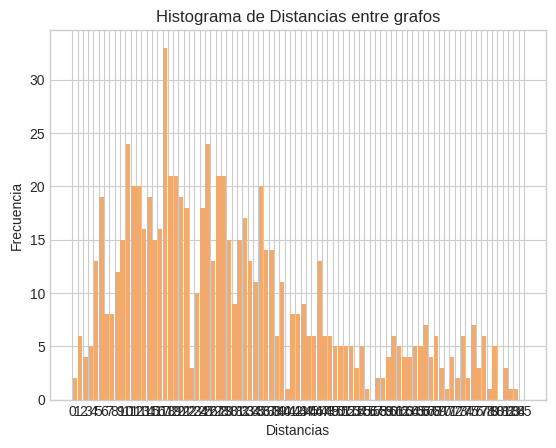

In [ ]:
import matplotlib.pyplot as plot

Z=normalized_dist*1000

intervalos = range(round(min(Z)), round(max(Z)) + 2) #calculamos los extremos de los intervalos

plot.hist(x=Z, bins=intervalos, color='#F2AB6D', rwidth=0.85)

plot.title('Histograma de Distancias entre grafos')
plot.xlabel('Distancias')
plot.ylabel('Frecuencia')
plot.xticks(intervalos)

plot.show() #dibujamos el histograma

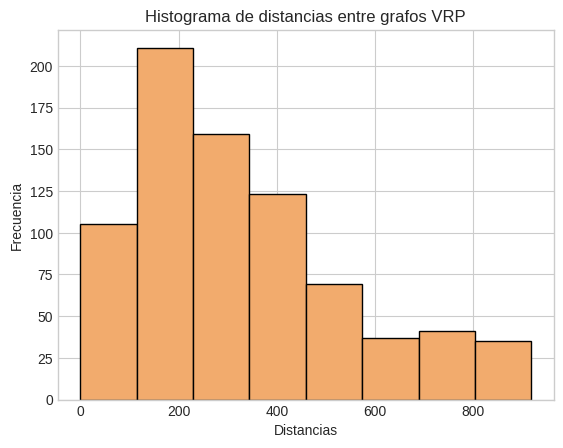

<Figure size 640x480 with 0 Axes>

In [ ]:
Z= dist #normalized_dist #*1000

plt.title('Histograma de distancias entre grafos VRP')
plt.hist(Z, bins=8, color='#F2AB6D', alpha=1, edgecolor = 'black',  linewidth=1)
plot.xlabel('Distancias')
plot.ylabel('Frecuencia')
plt.grid(True)
plt.show()
plt.clf()

# **karate club embeddings**

In [ ]:
!pip install karateclub


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached networkx-2.6.3-py3-none-any.whl (1.9 MB)
  Attempting uninstall: networkx
    Found existing installation: networkx 2.8.8
    Uninstalling networkx-2.8.8:
      Successfully uninstalled networkx-2.8.8


In [ ]:
import networkx as nx
from karateclub import DeepWalk

from karateclub import GL2Vec
from karateclub import Graph2Vec
from karateclub import WaveletCharacteristic

model = Graph2Vec(wl_iterations = 4, attributed = False, dimensions= 64, workers = 8, down_sampling= 0.0001, epochs= 50, learning_rate= 0.0125, min_count= 5, erase_base_features = True)
model.fit(Grafos)
embedding = model.get_embedding()

model1 = GL2Vec(wl_iterations=4, dimensions=64, workers=8, down_sampling=0.0001, epochs=80, learning_rate=0.0125, min_count=5, seed=42, erase_base_features=True)
model1.fit(Grafos)
embedding1 = model1.get_embedding()

model2=  WaveletCharacteristic(order= 3, eval_points= 30, theta_max = 2.5, tau = 1.0, pooling = 'mean') 
#pooling = 'mean', 'max', 'min'
model2.fit(Grafos)
embedding2 = model2.get_embedding()

/usr/local/lib/python3.9/dist-packages/karateclub/graph_embedding/waveletcharacteristic.py:49: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A = nx.adjacency_matrix(graph, nodelist=range(graph.number_of_nodes()))
<class 'networkx.utils.decorators.argmap'> compilation 30:4: FutureWarning: laplacian_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
/usr/local/lib/python3.9/dist-packages/karateclub/graph_embedding/waveletcharacteristic.py:49: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A = nx.adjacency_matrix(graph, nodelist=range(graph.number_of_nodes()))
<class 'networkx.utils.decorators.argmap'> compilation 30:4: FutureWarning: laplacian_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
/usr/local/lib/python3.9/dist-packages/karateclub/graph_embedding/waveletcharacteristic.py:49: FutureWarning: adjacency_matrix will 

In [ ]:
X = model.infer(Grafos)
X
X1 = model1.infer(Grafos)
X1
X2 = model2.infer(Grafos)
X2

/usr/local/lib/python3.9/dist-packages/karateclub/graph_embedding/waveletcharacteristic.py:49: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A = nx.adjacency_matrix(graph, nodelist=range(graph.number_of_nodes()))
<class 'networkx.utils.decorators.argmap'> compilation 30:4: FutureWarning: laplacian_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
/usr/local/lib/python3.9/dist-packages/karateclub/graph_embedding/waveletcharacteristic.py:49: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A = nx.adjacency_matrix(graph, nodelist=range(graph.number_of_nodes()))
<class 'networkx.utils.decorators.argmap'> compilation 30:4: FutureWarning: laplacian_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
/usr/local/lib/python3.9/dist-packages/karateclub/graph_embedding/waveletcharacteristic.py:49: FutureWarning: adjacency_matrix will 

array([[0.99969128, 0.97176231, 0.89976418, ..., 0.72657011, 0.6649708 ,
        0.59847214],
       [0.99977586, 0.9794821 , 0.92700811, ..., 0.58125609, 0.53197664,
        0.47877772],
       [0.99984614, 0.98590233, 0.94972316, ..., 0.43594207, 0.39898248,
        0.35908329],
       ...,
       [0.99984614, 0.98590233, 0.94972316, ..., 0.43594207, 0.39898248,
        0.35908329],
       [0.99989959, 0.99078975, 0.96706513, ..., 0.29062804, 0.26598832,
        0.23938886],
       [0.9999189 , 0.99255817, 0.97335609, ..., 0.21797103, 0.19949124,
        0.17954164]])

In [ ]:
from scipy.spatial import distance

Y = distance.pdist(X, 'euclidean')
Y1 = distance.pdist(X1, 'euclidean')
Y2 = distance.pdist(X2, 'euclidean')

In [ ]:
#Y.max()
#Y.min()
#Y.size

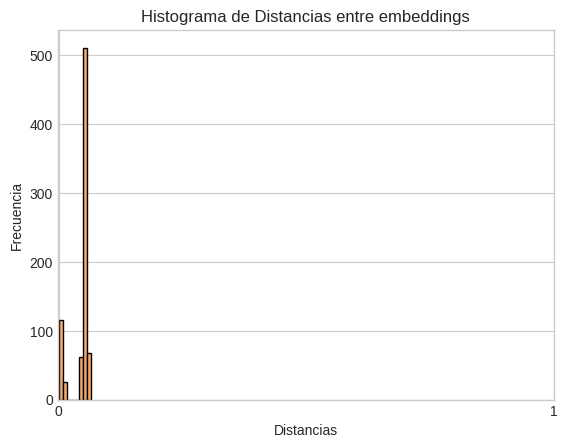

In [ ]:
import matplotlib.pyplot as plot

Z=Y

intervalos = range(round(min(Z)), round(max(Z)) + 2) #calculamos los extremos de los intervalos

#plot.hist(x=Z, bins=intervalos, color='#F2AB6D', rwidth=0.85)
plt.hist(Z, bins=8, color='#F2AB6D', alpha=1, edgecolor = 'black',  linewidth=1)

plot.title('Histograma de Distancias entre embeddings')
plot.xlabel('Distancias')
plot.ylabel('Frecuencia')
plot.xticks(intervalos)

plot.show() #dibujamos el histograma

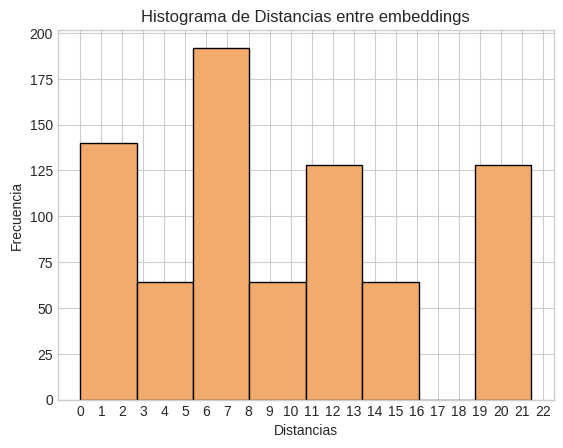

In [ ]:
import matplotlib.pyplot as plot

Z=Y2 #*100

intervalos = range(round(min(Z)), round(max(Z)) + 2) #calculamos los extremos de los intervalos

#plot.hist(x=Z, bins=intervalos, color='#F2AB6D', rwidth=0.85)
plt.hist(Z, bins=8, color='#F2AB6D', alpha=1, edgecolor = 'black',  linewidth=1)

plot.title('Histograma de Distancias entre embeddings')
plot.xlabel('Distancias')
plot.ylabel('Frecuencia')
plot.xticks(intervalos)

plot.show() #dibujamos el histograma

# **Spektral**

In [ ]:
! pip install spektral

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.1/140.1 kB 11.5 MB/s eta 0:00:00


In [ ]:
Grafos

In [ ]:
adj = Grafos[1].adj

In [ ]:
G1 =Grafos[1]
#print(nx.adjacency_matrix(G1))
array_adjacency = nx.adjacency_matrix(G1).toarray()
array_adjacency
#G1.edges.data()

<ipython-input-90-6ca4db8b2a12>:3: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  array_adjacency = nx.adjacency_matrix(G1).toarray()


array([[ 0,  8,  6,  0,  5,  7,  8,  9,  0,  9],
       [ 8,  0,  6,  0,  9,  9,  9, 12,  0,  9],
       [ 6,  6,  0,  0,  6,  6,  5,  9,  0,  6],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 5,  9,  6,  0,  0,  5,  5,  6,  0,  6],
       [ 7,  9,  6,  0,  5,  0,  2,  5,  0,  5],
       [ 8,  9,  5,  0,  5,  2,  0,  6,  0,  3],
       [ 9, 12,  9,  0,  6,  5,  6,  0,  0,  7],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 9,  9,  6,  0,  6,  5,  3,  7,  0,  0]])

In [ ]:
#G1.nodes.data()
node_atributes = np.array(list(nx.get_node_attributes(G1, "demanda_estimada").items()))
node_atributes = np.delete(node_atributes, 0, 1)
node_atributes

array([[ 0],
       [34],
       [21],
       [28],
       [27],
       [36],
       [35],
       [39],
       [23],
       [30]])

In [ ]:
"""spektral.data.graph.Graph(x=None, a=None, e=None, y=None)
Arguments
    x: np.array, the node features (shape (n_nodes, n_node_features));
    a: np.array or scipy.sparse matrix, the adjacency matrix (shape (n_nodes, n_nodes));
    e: np.array, the edge features (shape (n_nodes, n_nodes, n_edge_features) or (n_edges, n_edge_features));
    y: np.array, the node or graph labels (shape (n_nodes, n_labels) or (n_labels, ));

"""
import spektral

SG = spektral.data.graph.Graph(x= node_atributes, a= array_adjacency)
SG.a

array([[ 0,  8,  6,  0,  5,  7,  8,  9,  0,  9],
       [ 8,  0,  6,  0,  9,  9,  9, 12,  0,  9],
       [ 6,  6,  0,  0,  6,  6,  5,  9,  0,  6],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 5,  9,  6,  0,  0,  5,  5,  6,  0,  6],
       [ 7,  9,  6,  0,  5,  0,  2,  5,  0,  5],
       [ 8,  9,  5,  0,  5,  2,  0,  6,  0,  3],
       [ 9, 12,  9,  0,  6,  5,  6,  0,  0,  7],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 9,  9,  6,  0,  6,  5,  3,  7,  0,  0]])

In [ ]:
Grafos
adjs=[]
nods=[]

for g in Grafos:
  adjs.append((nx.adjacency_matrix(g).toarray()).astype(float))
  nods.append((np.delete(np.array(list(nx.get_node_attributes(g, "demanda_estimada").items())), 0, 1)).astype(float))


<ipython-input-93-1555d82399ed>:6: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  adjs.append((nx.adjacency_matrix(g).toarray()).astype(float))


In [ ]:
len(nods)
len(Grafos)
len(adjs)

40

In [ ]:
nods[0]

array([[ 0.],
       [34.],
       [21.],
       [28.],
       [27.],
       [36.],
       [35.],
       [39.],
       [23.],
       [30.]])

In [ ]:
""" spektral.data.utils.to_batch(x_list=None, a_list=None, e_list=None, mask=False)
Arguments
  x_list: a list of np.arrays of shape (n_nodes, n_node_features) -- note that n_nodes can change between graphs;
  a_list: a list of np.arrays or scipy.sparse matrices of shape (n_nodes, n_nodes);
  e_list: a list of np.arrays of shape (n_nodes, n_nodes, n_edge_features) or (n_edges, n_edge_features);
  mask: bool, if True, node attributes will be extended with a binary mask that indicates valid nodes 
        (the last feature of each node will be 1 if the node is valid and 0 otherwise). Use this flag in conjunction 
        with layers.base.GraphMasking to start the propagation of masks in a model.
"""
x_list, a_list = spektral.data.utils.to_batch(x_list=nods, a_list=adjs, e_list=None, mask=False)


In [ ]:
x_list
#len(a_list)

array([[[ 0.],
        [34.],
        [21.],
        [28.],
        [27.],
        [36.],
        [35.],
        [39.],
        [23.],
        [30.]],

       [[ 0.],
        [34.],
        [21.],
        [28.],
        [27.],
        [36.],
        [35.],
        [39.],
        [23.],
        [30.]],

       [[ 0.],
        [34.],
        [21.],
        [28.],
        [27.],
        [36.],
        [35.],
        [39.],
        [23.],
        [30.]],

       [[ 0.],
        [34.],
        [21.],
        [28.],
        [27.],
        [36.],
        [35.],
        [39.],
        [23.],
        [30.]],

       [[ 0.],
        [34.],
        [21.],
        [28.],
        [27.],
        [36.],
        [35.],
        [39.],
        [23.],
        [30.]],

       [[ 0.],
        [32.],
        [40.],
        [48.],
        [32.],
        [40.],
        [52.],
        [49.],
        [41.],
        [51.]],

       [[ 0.],
        [32.],
        [40.],
        [48.],
        [32.],
        [40.]

In [ ]:
!python3 -c 'import tensorflow as tf; print(tf.__version__)'

2023-04-14 14:50:28.545779: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2.12.0


In [ ]:
import numpy as np
import scipy.sparse as sp
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.metrics import categorical_accuracy
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

from spektral.data import Dataset, DisjointLoader, Graph, BatchLoader
from spektral.layers import GCSConv, GlobalAvgPool
from spektral.transforms.normalize_adj import NormalizeAdj

from spektral.layers import ECCConv, GlobalSumPool, GraphMasking

################################################################################
# Load data
################################################################################
class MyDatasetInfer(Dataset):
    """
    A dataset of VRP graphs.

    """

    def __init__(self, x_list, a_list , **kwargs):
        self.x_list, self.a_list = spektral.data.utils.to_batch(x_list=nods, a_list=adjs, e_list=None, mask=False)

        super().__init__(**kwargs)

    def read(self):  
        # We must return a list of Graph objects
        return [Graph(x=self.x_list[i], a=self.a_list[i]) for i in range(len(self.x_list))]


data_infer = MyDatasetInfer(nods,adjs)

################################################################################################################################################################
################################################################################################################################################################

# Data loader
loader_infer = BatchLoader(data_infer, batch_size=1, mask=True)#, epochs=epochs)

################################################################################################################################################################
################################################################################################################################################################

In [ ]:
import numpy as np
import scipy.sparse as sp
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.metrics import categorical_accuracy
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

from spektral.data import Dataset, DisjointLoader, Graph, BatchLoader
from spektral.layers import GCSConv, GlobalAvgPool
from spektral.transforms.normalize_adj import NormalizeAdj

from spektral.layers import ECCConv, GlobalSumPool, GraphMasking

################################################################################
# Config
################################################################################
learning_rate = 1e-2  # Learning rate
epochs = 400  # Number of training epochs
es_patience = 10  # Patience for early stopping
batch_size = 32  # Batch size

x_list = []
a_list = []

n_out = 128

################################################################################
# Load data
################################################################################
class MyDataset(Dataset):
    """
    A dataset of VRP graphs.

    """

    def __init__(self, x_list, a_list , **kwargs):
        self.x_list, self.a_list = spektral.data.utils.to_batch(x_list=nods, a_list=adjs, e_list=None, mask=False)

        super().__init__(**kwargs)

    def read(self):  
        # We must return a list of Graph objects
        return [Graph(x=self.x_list[i], a=self.a_list[i], y=1) for i in range(len(self.x_list))]


data = MyDataset(nods,adjs)

################################################################################################################################################################

# Train/valid/test split
idxs = np.random.permutation(len(data))
split_va, split_te = int(0.7 * len(data)), int(0.9 * len(data))
idx_tr, idx_va, idx_te = np.split(idxs, [split_va, split_te])
data_tr = data[idx_tr]
data_va = data[idx_va]
data_te = data[idx_te]


# Data loaders
loader_tr = BatchLoader(data_tr, batch_size=batch_size, epochs=epochs)
loader_va = BatchLoader(data_va, batch_size=batch_size)
loader_te = BatchLoader(data_te, batch_size=batch_size)



In [ ]:
################################################################################
# PRUEBAS MINCUT SOLO
################################################################################

import numpy as np

from spektral.data import BatchLoader
from spektral.layers import GCSConv, GlobalSumPool, GraphMasking, MinCutPool, GlobalAttentionPool, DiffPool, LaPool

################################################################################
# Config
################################################################################
learning_rate = 1e-3  # Learning rate
epochs = 10  # Number of training epochs
batch_size = 1 #32  # Batch size

################################################################################
# Load data
################################################################################
dataset = MyDataset(nods,adjs)


# Parameters
N = max(g.n_nodes for g in dataset)
F = dataset.n_node_features  # Dimension of node features
S = dataset.n_edge_features  # Dimension of edge features
n_out = 10 #dataset.n_labels  # Dimension of the target # 128 #

# Train/test split
idxs = np.random.permutation(len(dataset))
split_va, split_te = int(0.8 * len(dataset)), int(0.9 * len(dataset))
idx_tr, idx_va, idx_te = np.split(idxs, [split_va, split_te])
dataset_tr = dataset[idx_tr]
dataset_va = dataset[idx_va]
dataset_te = dataset[idx_te]

loader_tr = BatchLoader(dataset_tr, batch_size=batch_size, mask=True)
loader_va = BatchLoader(dataset_va, batch_size=batch_size, mask=True)
loader_te = BatchLoader(dataset_te, batch_size=batch_size, mask=True)


################################################################################
# Build model
################################################################################

mask = GraphMasking()
conv1 = GCSConv(1, activation="relu")
pool = DiffPool(4) #N//2) # MinCutPool(N // 2) #
diff_pool = DiffPool(4) 
mincut_pool = MinCutPool(N // 2)
la_pool = LaPool(shortest_path_reg=False)

"""
x, a = inputs
x = mask(x)
x = conv1([x, a])
x_pool, a_pool = pool([x, a])

"""

'\nx, a = inputs\nx = mask(x)\nx = conv1([x, a])\nx_pool, a_pool = pool([x, a])\n\n'

/usr/local/lib/python3.9/dist-packages/spektral/data/utils.py:221: UserWarning: you are shuffling a 'MyDataset' object which is not a subclass of 'Sequence'; `shuffle` is not guaranteed to behave correctly. E.g., non-numpy array/tensor objects with view semantics may contain duplicates after shuffling.
  np.random.shuffle(a)
/usr/local/lib/python3.9/dist-packages/keras/initializers/initializers.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


{(0, 1): 2.299891320781213e-18,
 (0, 2): 8.521613054934157e-21,
 (0, 3): 2.177902302946677e-11,
 (1, 2): 6.562281371514517e-14,
 (1, 3): 0.00013715594832319766,
 (2, 3): 5.74575892642315e-07}

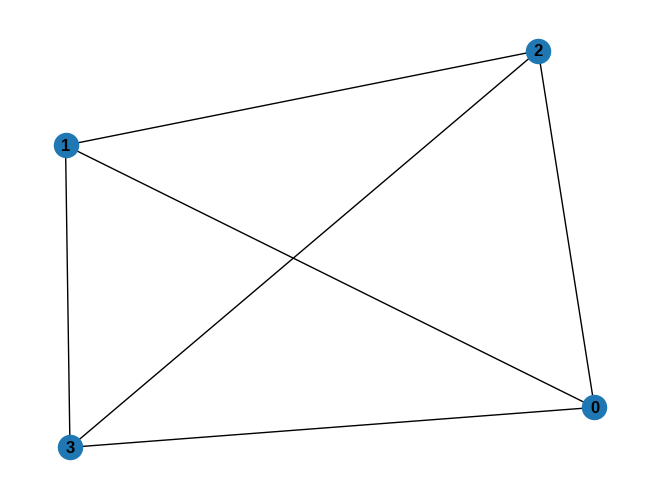

In [ ]:
loader=loader_tr.load()

inputs,label = loader.__next__()
inputs,label = loader.__next__()
#inputs,label = loader.__next__()

######
x, a = inputs
x = mask(x)
#print(x)
#x = conv1([x, a])
#print(x)
x_pool, a_pool = pool([x, a])

x_pool = conv1([x_pool, a_pool])

A = a_pool[0]
A = A.numpy()
np.fill_diagonal(A, 0)
X = x_pool[0]


G_pool_1 = nx.from_numpy_matrix(A)


for i in range(len(X)):
  G_pool_1.nodes[i]['demanda_estimada'] = X[i]


nx.draw(G_pool_1, with_labels=True, font_weight='bold')



distancias = nx.get_edge_attributes(G_pool_1,'weight')
demandas = nx.get_node_attributes(G_pool_1, 'demanda_estimada')

distancias

In [ ]:
Pooled_Graphs = []
loader=loader_infer.load()

for i in range(loader.dataset.n_graphs):  
  #inputs,label = loader.__next__()
  #x, a = inputs
  x, a = loader.__next__()
  x = mask(x)
  #x = conv1([x, a])
  x_pool, a_pool = pool([x, a])
  
  #x_pool = conv1([x_pool, a_pool])

  A = a_pool[0]
  A = A.numpy()
  np.fill_diagonal(A, 0)
  X = x_pool[0]
  G_pool = nx.from_numpy_matrix(A)
  for j in range(len(X)):
    G_pool.nodes[j]['demanda_estimada'] = X[j]
  Pooled_Graphs.append(G_pool)


/usr/local/lib/python3.9/dist-packages/spektral/data/utils.py:221: UserWarning: you are shuffling a 'MyDatasetInfer' object which is not a subclass of 'Sequence'; `shuffle` is not guaranteed to behave correctly. E.g., non-numpy array/tensor objects with view semantics may contain duplicates after shuffling.
  np.random.shuffle(a)


In [ ]:
DiffPool_PooledGraphs = []
loader=loader_infer.load()

for i in range(loader.dataset.n_graphs):  
  #inputs,label = loader.__next__()
  #x, a = inputs
  x, a = loader.__next__()
  x = mask(x)
  #x = conv1([x, a])
  x_pool, a_pool = diff_pool([x, a])
  
  #x_pool = conv1([x_pool, a_pool])

  A = a_pool[0]
  A = A.numpy()
  np.fill_diagonal(A, 0)
  X = x_pool[0]
  G_pool = nx.from_numpy_matrix(A)
  for j in range(len(X)):
    G_pool.nodes[j]['demanda_estimada'] = X[j]
  DiffPool_PooledGraphs.append(G_pool)

In [ ]:
MinCut_PooledGraphs = []
loader=loader_infer.load()

for i in range(loader.dataset.n_graphs):  
  #inputs,label = loader.__next__()
  #x, a = inputs
  x, a = loader.__next__()
  x = mask(x)
  #x = conv1([x, a])
  x_pool, a_pool = mincut_pool([x, a])
  
  #x_pool = conv1([x_pool, a_pool])

  A = a_pool[0]
  A = A.numpy()
  np.fill_diagonal(A, 0)
  X = x_pool[0]
  G_pool = nx.from_numpy_matrix(A)
  for j in range(len(X)):
    G_pool.nodes[j]['demanda_estimada'] = X[j]
  MinCut_PooledGraphs.append(G_pool)

In [ ]:
x, a = loader.__next__()

dfa = pd.DataFrame(a[0])
dfa.index[0]

0

In [ ]:
Pooled_Graphs

In [ ]:
distancias_pool = graphs_distance(Pooled_Graphs)
#distancias_pool

distancias_diffPool = graphs_distance(DiffPool_PooledGraphs)
distancias_mincutPool = graphs_distance(MinCut_PooledGraphs)
#distancias_laPool = graphs_distance(LA_PooledGraphs)

/root/.local/lib/python3.9/site-packages/networkx/algorithms/similarity.py:1078: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


In [ ]:
dist_pool = np.asarray(distancias_pool)
dist_pool = np.transpose(dist_pool)
dist_pool = dist_pool[0]
normalized_dist_pool = dist_pool/np.linalg.norm(dist_pool)
#print(normalized_dist_pool)
normalized_dist_pool

1.0

In [ ]:
dist_diffPool = np.asarray(distancias_diffPool)
dist_diffPool = np.transpose(dist_diffPool)
dist_diffPool = dist_diffPool[0]

dist_mincutPool = np.asarray(distancias_mincutPool)
dist_mincutPool = np.transpose(dist_mincutPool)
dist_mincutPool = dist_mincutPool[0]

"""
dist_laPool = np.asarray(distancias_laPool)
dist_laPool = np.transpose(dist_laPool)
dist_laPool = dist_laPool[0]
"""

'\ndist_laPool = np.asarray(distancias_laPool)\ndist_laPool = np.transpose(dist_laPool)\ndist_laPool = dist_laPool[0]\n'

# **Análisis de Correlación**

In [ ]:
import matplotlib.pyplot as plt

array_distances = np.array([dist,Y,Y1,Y2]) #,dist_diffPool,dist_mincutPool])

array_distances = array_distances.transpose()

df = pd.DataFrame(array_distances, columns = ['GraphDist','Graph2Vec','GL2Vec','WaveletCh']) #,'DiffPool','MinCutPool'])
df.head()

,GraphDist,Graph2Vec,GL2Vec,WaveletCh
0,106.0,0.054936,1.396408,6.662633
1,194.0,0.062386,0.966150,13.140463
2,258.0,0.054235,1.033399,18.991153
3,276.0,0.051415,1.036752,21.450152
4,116.0,0.001312,0.029276,0.000000


In [ ]:
correlacionPearson = df.corr(method="pearson")
correlacionKendall = df.corr(method="kendall")
correlacionSpearman = df.corr(method="spearman")
correlacionPearson                                                  

,GraphDist,Graph2Vec,GL2Vec,WaveletCh
GraphDist,1.000000,0.334916,0.582692,0.597044
Graph2Vec,0.334916,1.000000,0.670769,0.642532
GL2Vec,0.582692,0.670769,1.000000,0.713100
WaveletCh,0.597044,0.642532,0.713100,1.000000


In [ ]:
correlacionKendall

,GraphDist,Graph2Vec,GL2Vec,WaveletCh
GraphDist,1.000000,0.297316,0.431296,0.468146
Graph2Vec,0.297316,1.000000,0.525578,0.390146
GL2Vec,0.431296,0.525578,1.000000,0.666661
WaveletCh,0.468146,0.390146,0.666661,1.000000


In [ ]:
correlacionSpearman

,GraphDist,Graph2Vec,GL2Vec,WaveletCh
GraphDist,1.000000,0.433626,0.608693,0.633701
Graph2Vec,0.433626,1.000000,0.725535,0.539551
GL2Vec,0.608693,0.725535,1.000000,0.806572
WaveletCh,0.633701,0.539551,0.806572,1.000000


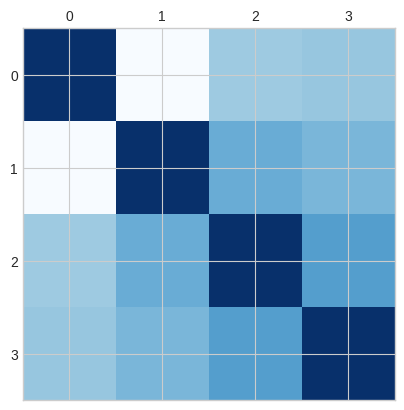

In [ ]:
plt.matshow(df.corr(method="pearson"),cmap=plt.cm.Blues)

<ipython-input-120-c25a777061c5>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes.set_xticklabels(['']+columns)
<ipython-input-120-c25a777061c5>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes.set_yticklabels(['']+columns)


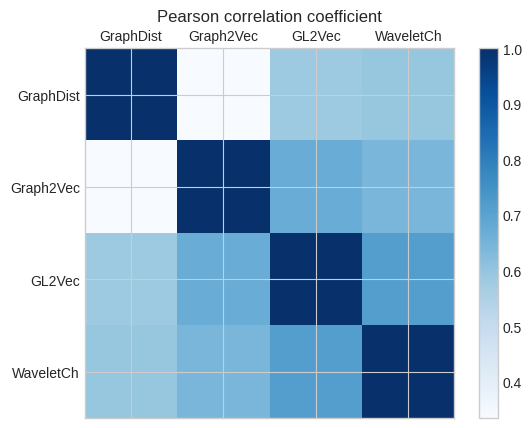

In [ ]:
figure = plt.figure()
axes = figure.add_subplot(111)

# using the matshow() function
caxes = axes.matshow(df.corr(method="pearson"),cmap=plt.cm.Blues, interpolation ='nearest')
figure.colorbar(caxes)
figure

columns = ['GraphDist','Graph2Vec','GL2Vec','WaveletCh'] #,'DiffPool','MinCutPool']
axes.set_xticklabels(['']+columns)
axes.set_yticklabels(['']+columns)
axes.set_title("Pearson correlation coefficient")

plt.show()

<ipython-input-121-2e8d2cfe21ea>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes.set_xticklabels(['']+columns)
<ipython-input-121-2e8d2cfe21ea>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes.set_yticklabels(['']+columns)


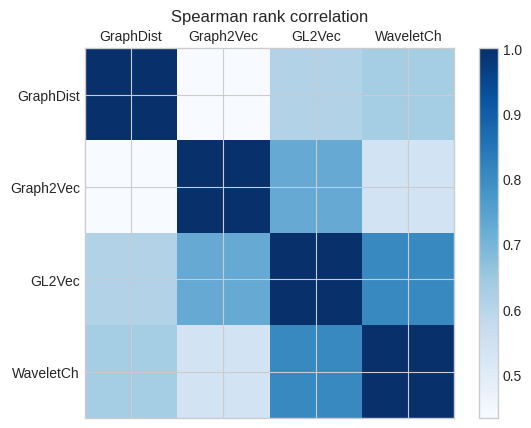

In [ ]:
figure = plt.figure()
axes = figure.add_subplot(111)

# using the matshow() function
caxes = axes.matshow(df.corr(method="spearman"),cmap=plt.cm.Blues, interpolation ='nearest')
figure.colorbar(caxes)
figure

columns = ['GraphDist','Graph2Vec','GL2Vec','WaveletCh'] #,'DiffPool','MinCutPool']
axes.set_xticklabels(['']+columns)
axes.set_yticklabels(['']+columns)
axes.set_title("Spearman rank correlation")

plt.show()

In [ ]:
data = df.copy()
data.columns

Index(['GraphDist', 'Graph2Vec', 'GL2Vec', 'WaveletCh'], dtype='object')

In [ ]:
from sklearn.preprocessing import MinMaxScaler

data = df.copy()


scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)
scaled_data = pd.DataFrame(scaled_data, columns = ['GraphDist','Graph2Vec','GL2Vec','WaveletCh']) #,'DiffPool','MinCutPool'])

scaled_data



,GraphDist,Graph2Vec,GL2Vec,WaveletCh
0,0.115468,0.830931,0.921754,0.310610
1,0.211329,0.945839,0.636233,0.612605
2,0.281046,0.820117,0.680860,0.885362
3,0.300654,0.776620,0.683085,1.000000
4,0.126362,0.003786,0.014520,0.000000
...,...,...,...,...
775,0.391068,0.803742,0.487318,0.588242
776,0.476035,0.745309,0.501842,0.709496
777,0.176471,0.752257,0.179198,0.288163
778,0.261438,0.801212,0.194501,0.415162


In [ ]:
scaled_data.corr(method="pearson")
#scaled_data.corr(method="spearman")

,GraphDist,Graph2Vec,GL2Vec,WaveletCh
GraphDist,1.000000,0.334916,0.582692,0.597044
Graph2Vec,0.334916,1.000000,0.670769,0.642532
GL2Vec,0.582692,0.670769,1.000000,0.713100
WaveletCh,0.597044,0.642532,0.713100,1.000000


In [ ]:
scaled_data['GraphDist']
scaled_data['GraphDist']
scaled_data['Graph2Vec']
scaled_data['GL2Vec']
scaled_data['WaveletCh']
#scaled_data['DiffPool']
#scaled_data['MinCutPool']

0      0.310610
1      0.612605
2      0.885362
3      1.000000
4      0.000000
         ...   
775    0.588242
776    0.709496
777    0.288163
778    0.415162
779    0.130368
Name: WaveletCh, Length: 780, dtype: float64

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

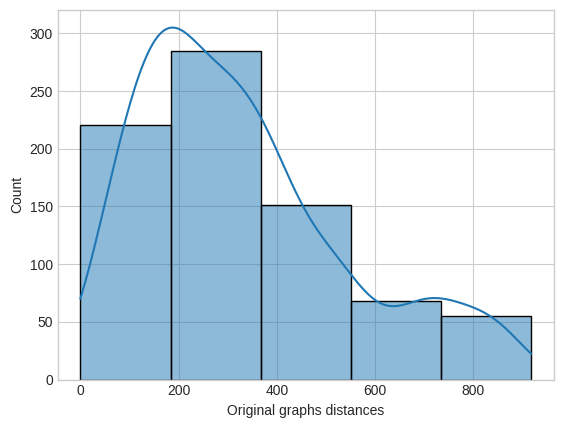

In [ ]:
#sns.histplot(data=dist, bins=5, kde=True).set(title='Original graphs')

ax = sns.histplot(data=dist, bins=5, kde=True)
ax.set(xlabel='Original graphs distances', ylabel='Count')
plt.show()

[Text(0.5, 1.0, 'Graph2Vec')]

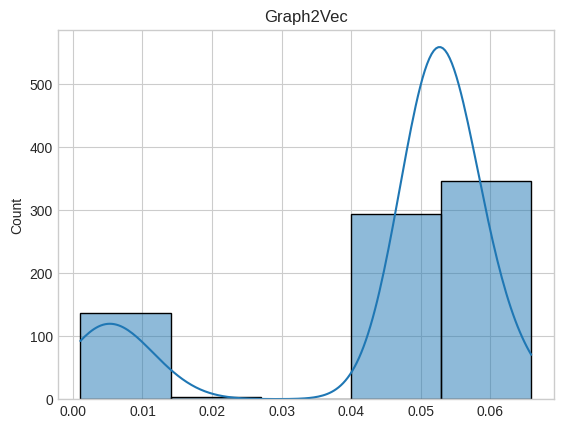

In [ ]:
sns.histplot(data=Y, bins=5, kde=True).set(title='Graph2Vec')
#Y = distancias Graph2Vec

[Text(0.5, 1.0, 'GL2Vec')]

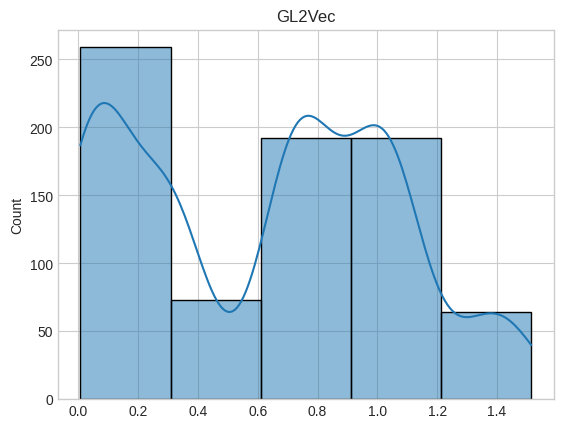

In [ ]:
sns.histplot(data=Y1, bins=5, kde=True).set(title='GL2Vec')
#Y1 = distancias GL2Vec

[Text(0.5, 1.0, 'Wavelet Characteristic')]

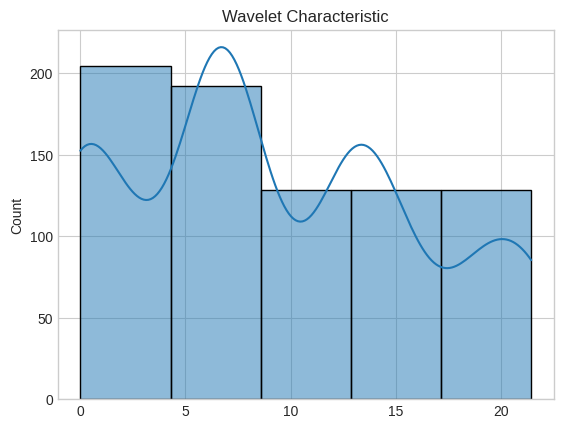

In [ ]:
sns.histplot(data=Y2, bins=5, kde=True).set(title='Wavelet Characteristic')
#Y2 = distancias Wavelets

## histogramas normalizados

In [ ]:
hist_graphDistN = sns.histplot(data=scaled_data['GraphDist'], bins=8, kde=True)
hist_graphDistN.set(xlabel='Original graphs distances', ylabel='Count')
plt.show()

hist_Graph2VecN = sns.histplot(data=scaled_data['Graph2Vec'], bins=8, kde=True)
hist_Graph2VecN.set(xlabel='Graph2Vec distances', ylabel='Count')
plt.show()

hist_GL2VecN = sns.histplot(data=scaled_data['GL2Vec'], bins=8, kde=True)
hist_GL2VecN.set(xlabel='GL2Vec distances', ylabel='Count')
plt.show()

hist_WaveletChN = sns.histplot(data=scaled_data['WaveletCh'], bins=8, kde=True)
hist_WaveletChN.set(xlabel='WaveletCh distances', ylabel='Count')
plt.show()